In [164]:
from datetime import date
import os
import zipfile
from google.colab import drive #Mount Google Drive
import pandas as pd # many functions and methodsexpedite the data analysis process, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # standard trigonometric functions, functions for arithmetic operations, handling complex numbers, etc
import seaborn as sns # used for data visualization and exploratory data analysis
import matplotlib.pyplot as plt # Matplotlib module which provides a MATLAB-like interface
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range

from statsmodels.tsa.arima_model import ARMA #Advanced Time Series Analysis with Auto Regressive Moving Average (ARMA)
from statsmodels.tsa.arima_model import ARIMA #Advanced Time Series Analysis with Auto Regressive Integrated Moving Average (ARIMA)

from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller unit root test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Plot the autocorrelation function
from statsmodels.tsa.stattools import kpss #statistical test to check for stationarity of a series around a deterministic trend
from statsmodels.tsa.seasonal import seasonal_decompose #Decompose Time Series Data into Trend and Seasonality

from pandas import to_datetime #This function converts a scalar, array-like, Series or DataFrame /dict-like to a pandas datetime object.
from pandas import DataFrame #a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.
from sklearn.metrics import mean_squared_error, mean_absolute_error # the mean squared error (MSE) is an estimator measures the average of the squares of the errors, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range. 

#Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM #LSTM (Long Short-Term Memory) primarily solves the vanishing gradient problem in backpropagation in Neural Network
from keras.layers import Conv1D
from keras.layers import Bidirectional
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/traffic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/traffic')

In [4]:
dataset = pd.read_csv('/tmp/traffic/covid_impact_on_airport_traffic.csv')
dataset = dataset.drop(columns = ['AggregationMethod','Version','Centroid','Geography'])
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [5]:
dataset.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,AU,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,AU,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,AU,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,AU,Australia


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               7247 non-null   datetime64[ns]
 1   AirportName        7247 non-null   object        
 2   PercentOfBaseline  7247 non-null   int64         
 3   City               7247 non-null   object        
 4   State              7247 non-null   object        
 5   ISO_3166_2         7247 non-null   object        
 6   Country            7247 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 396.4+ KB


In [7]:
dataset.shape

(7247, 7)

In [8]:
dataset.columns

Index(['Date', 'AirportName', 'PercentOfBaseline', 'City', 'State',
       'ISO_3166_2', 'Country'],
      dtype='object')

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.isnull().sum()

Date                 0
AirportName          0
PercentOfBaseline    0
City                 0
State                0
ISO_3166_2           0
Country              0
dtype: int64

In [11]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PercentOfBaseline,7247.0,66.651442,22.134433,0.0,53.0,67.0,84.0,100.0


In [12]:
dataset["Country"].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [13]:
dataset.groupby("Country")[['State','City','AirportName']].nunique()

,State,City,AirportName
Country,,,
Australia,1,1,1
Canada,6,9,9
Chile,1,1,1
United States of America (the),15,16,17


In [14]:
dataset["City"].unique()

array(['Sydney', 'Santiago', 'Calgary', 'Leduc County', 'Richmond',
       'Winnipeg', 'Halifax', 'Mississauga', 'Hamilton', 'Mirabel',
       'Dorval', 'Los Angeles', 'South San Francisco', 'Denver',
       'Miami Springs', 'College Park', 'Urban Honolulu', 'Chicago',
       'Boston', 'Romulus', 'Charlotte', 'Newark', 'Paradise', 'New York',
       'Grapevine', 'Floris', 'SeaTac'], dtype=object)

In [15]:
dataset.groupby("AirportName")["Country"].count()

AirportName
Boston Logan International                   261
Calgary International                        261
Charlotte Douglas International              261
Chicago OHare International                  261
Dallas/Fort Worth International              262
Daniel K. Inouye International               261
Denver International                         261
Detroit Metropolitan Wayne County            261
Edmonton International                       236
Halifax International                        252
Hamilton International                       260
Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Kingsford Smith                              257
LaGuardia                                    261
Los Angeles International                    262
McCarran International                       261
Miami International                          261
Montreal Mirabel                             257
Montreal Trudeau                             262
Newark L

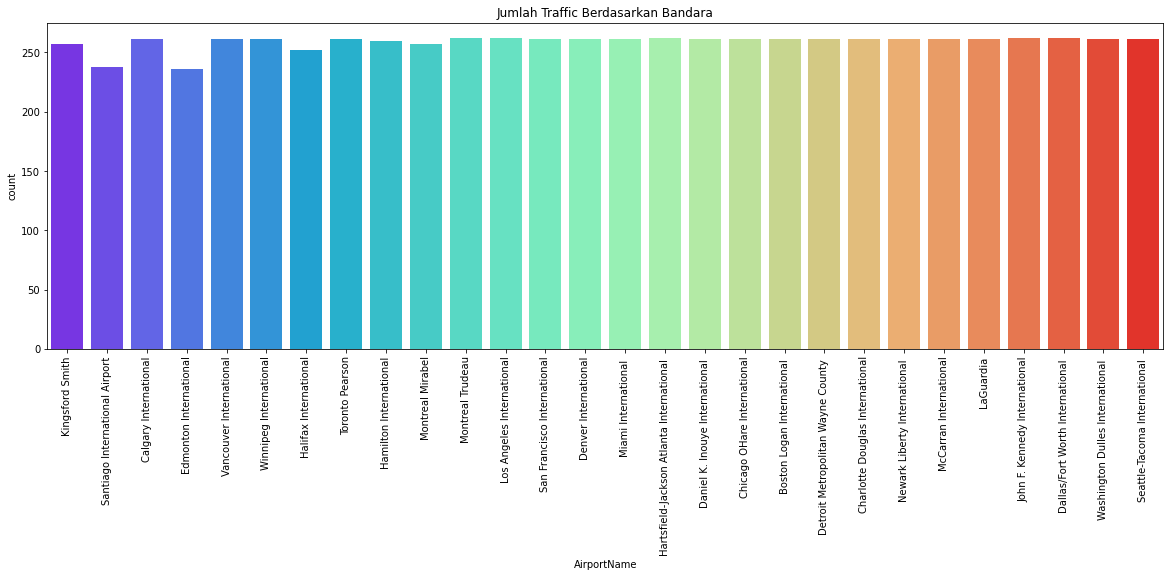

In [16]:
plt.figure(figsize=(20,6))
figure1 = sns.countplot(x = 'AirportName', data = dataset , palette='rainbow')
figure1.set_xticklabels(figure1.get_xticklabels(), rotation=90)
figure1.set_title("Jumlah Traffic Berdasarkan Bandara")
plt.show();

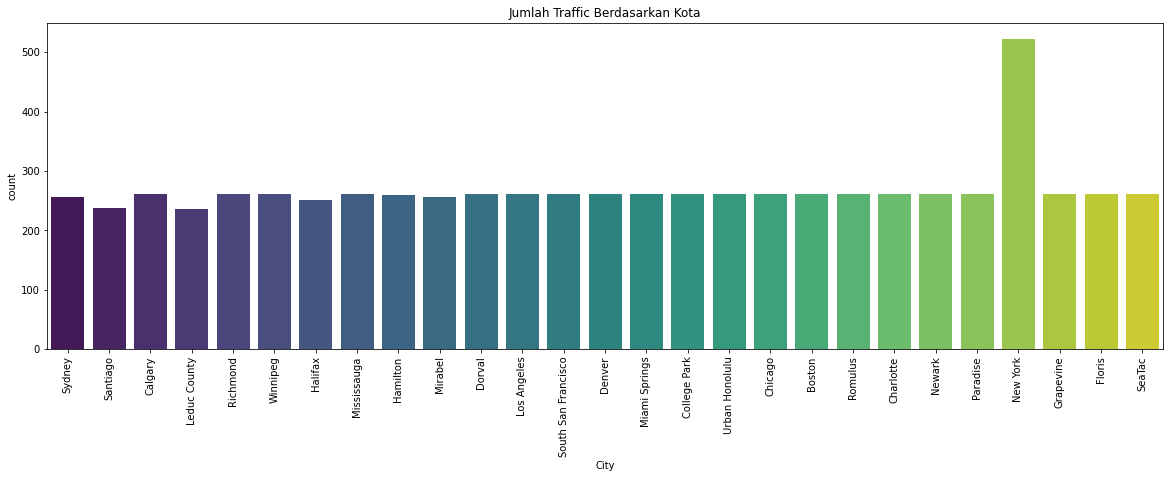

In [17]:
plt.figure(figsize=(20,6))
figure2 = sns.countplot(x = 'City', data = dataset , palette='viridis')
figure2.set_xticklabels(figure2.get_xticklabels(), rotation=90)
figure2.set_title("Jumlah Traffic Berdasarkan Kota")
plt.show();

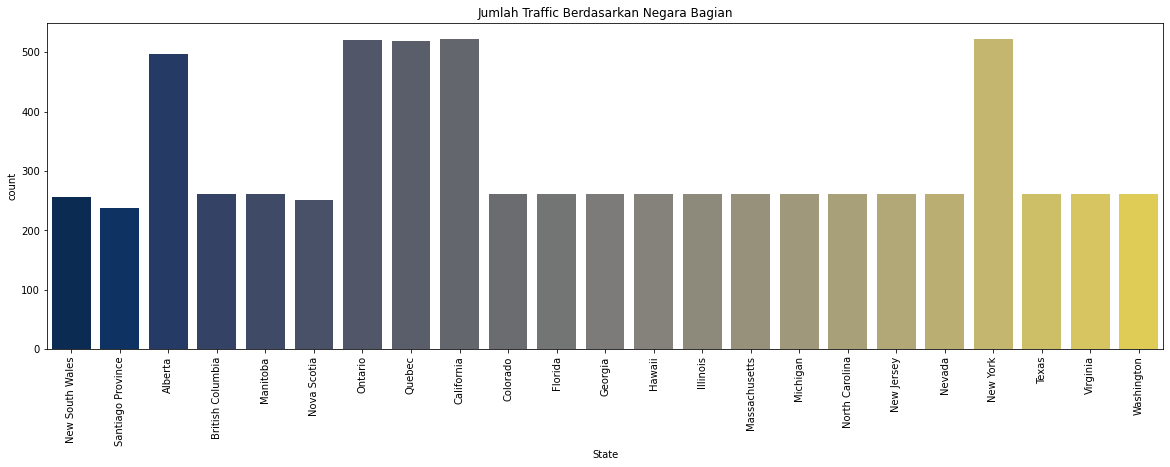

In [18]:
plt.figure(figsize=(20,6))
figure3 = sns.countplot(x = 'State', data = dataset , palette='cividis')
figure3.set_xticklabels(figure3.get_xticklabels(), rotation=90)
figure3.set_title("Jumlah Traffic Berdasarkan Negara Bagian")
plt.show();

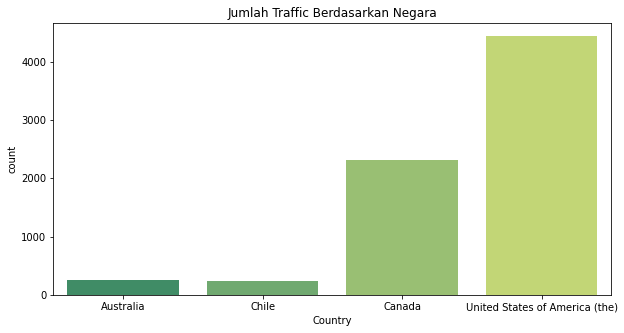

In [19]:
plt.figure(figsize=(10,5))
figure4 = sns.countplot(x = 'Country', data = dataset , palette='summer')
figure4.set_xticklabels(figure4.get_xticklabels())
figure4.set_title("Jumlah Traffic Berdasarkan Negara")
plt.show();

#Dataset USA

In [20]:
dataset_US = dataset[dataset['Country']=='United States of America (the)'].sort_values(by="Date")
dataset_US.shape

(4441, 7)

In [21]:
dataset_US.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
6302,2020-03-16,John F. Kennedy International,70,New York,New York,US-NY,United States of America (the)
3759,2020-03-16,Miami International,98,Miami Springs,Florida,US-FL,United States of America (the)
4725,2020-03-16,Boston Logan International,97,Boston,Massachusetts,US-MA,United States of America (the)
5014,2020-03-16,Detroit Metropolitan Wayne County,73,Romulus,Michigan,US-MI,United States of America (the)
3413,2020-03-16,Denver International,94,Denver,Colorado,US-CO,United States of America (the)


In [22]:
dataset_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 6302 to 5511
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4441 non-null   datetime64[ns]
 1   AirportName        4441 non-null   object        
 2   PercentOfBaseline  4441 non-null   int64         
 3   City               4441 non-null   object        
 4   State              4441 non-null   object        
 5   ISO_3166_2         4441 non-null   object        
 6   Country            4441 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 277.6+ KB


In [23]:
dataset_US.nunique()

Date                 262
AirportName           17
PercentOfBaseline     92
City                  16
State                 15
ISO_3166_2            15
Country                1
dtype: int64

In [24]:
df_USA = pd.DataFrame(dataset_US.groupby('Date')['PercentOfBaseline'].mean())
df_USA.shape

(262, 1)

In [25]:
df_USA.head()

,PercentOfBaseline
Date,
2020-03-16,88.058824
2020-03-17,87.823529
2020-03-18,81.705882
2020-03-19,73.764706
2020-03-20,73.058824


In [26]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


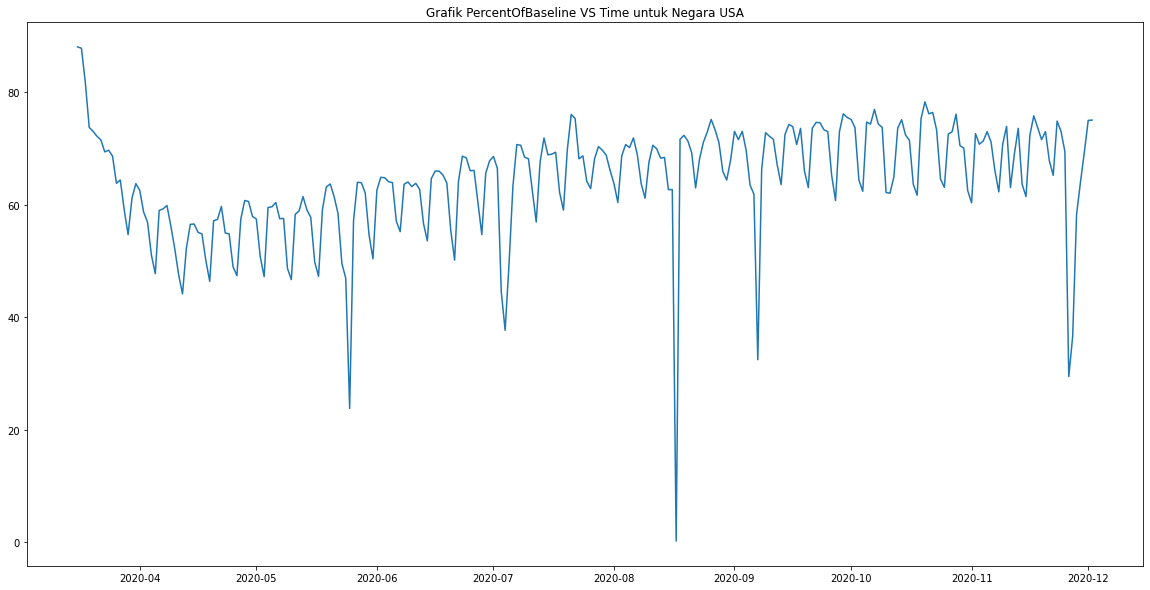

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df_USA)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara USA")
plt.show()

In [28]:
print('Results of Dickey-Fuller Test:')
test_USA = adfuller(df_USA['PercentOfBaseline'], autolag='AIC')
output_USA = pd.Series(test_USA[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_USA[4].items():
    output_USA['Critical Value (%s)'%key] = value
print(output_USA)

Results of Dickey-Fuller Test:
Test Statistic                  -2.920672
p-value                          0.042996
#Lags Used                       6.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [29]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest_USA = kpss(df_USA['PercentOfBaseline'].dropna(), regression='c')
kpss_output_USA = pd.Series(kpsstest_USA[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest_USA[3].items():
    kpss_output_USA['Critical Value (%s)'%key] = value
print (kpss_output_USA)

Results of KPSS Test:
Test Statistic            0.84213
p-value                   0.01000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


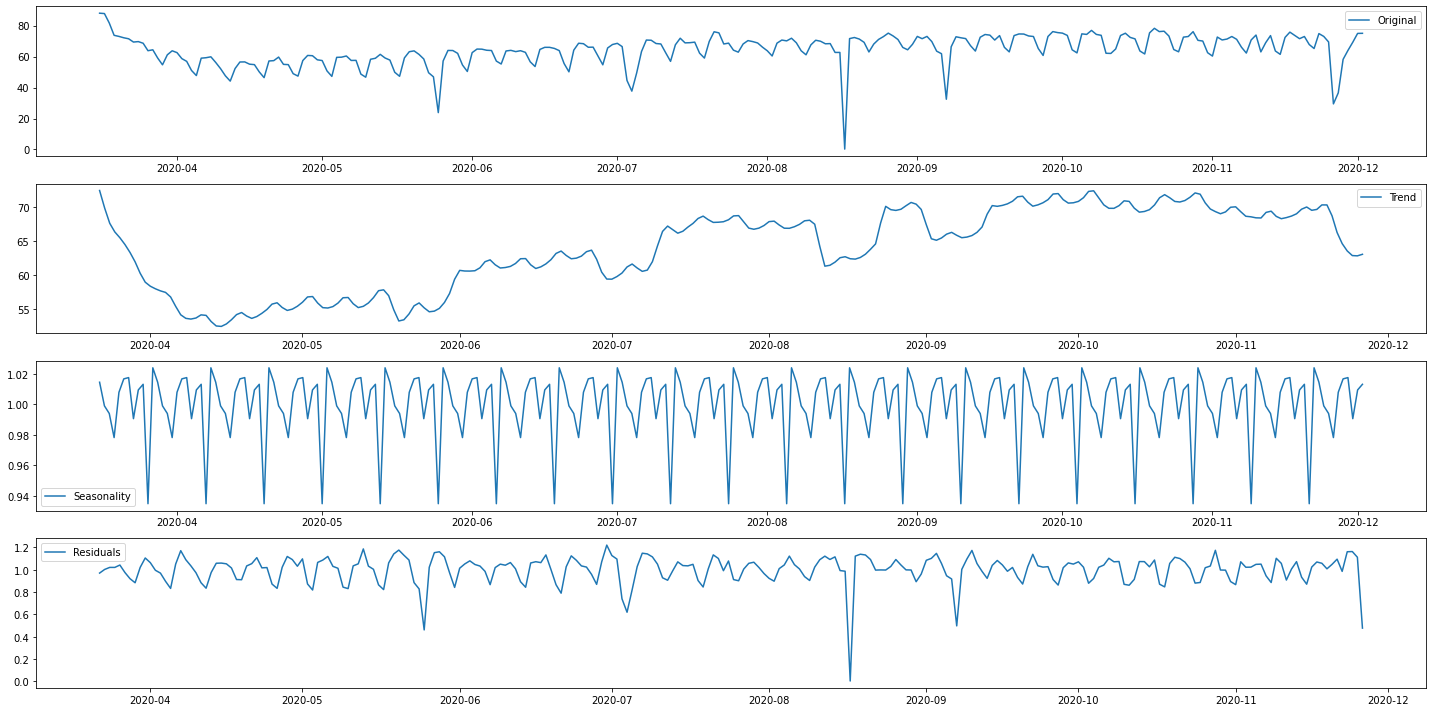

In [30]:
decomposition_USA = seasonal_decompose(df_USA.dropna(), model='multiplicative', freq=12)

trend1 = decomposition_USA.trend
seasonal1 = decomposition_USA.seasonal
residual1 = decomposition_USA.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_USA['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

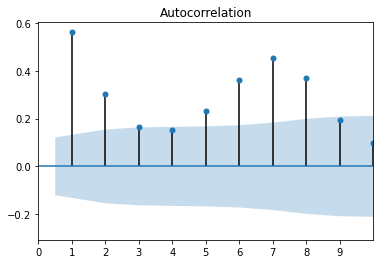

In [31]:
plot_acf(df_USA['PercentOfBaseline'], zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

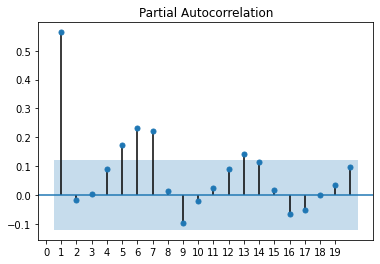

In [32]:
plot_pacf(df_USA['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

#ARMA (Auto Regressive Moving Average) Model FOR USA

In [33]:
# Create Training and Test for ARMA
size_ARMA_USA = int(len(df_USA['PercentOfBaseline'])*0.8)
train_ARMA_USA = df_USA['PercentOfBaseline'].iloc[:size_ARMA_USA]
test_ARMA_USA = df_USA['PercentOfBaseline'].iloc[size_ARMA_USA:]
# Build Model
model_ARMA_USA = ARMA(train_ARMA_USA, order=(1,2), freq='D')  
fitted_ARMA_USA = model_ARMA_USA.fit() 
print(fitted_ARMA_USA.summary())

# Forecast
fc_ARMA_USA, se_ARMA_USA, conf_ARMA_USA = fitted_ARMA_USA.forecast(len(test_ARMA_USA), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARMA_USA = pd.Series(fc_ARMA_USA, index=test_ARMA_USA.index)
lower_series_ARMA_USA = pd.Series(conf_ARMA_USA[:, 0], index=test_ARMA_USA.index)
upper_series_ARMA_USA = pd.Series(conf_ARMA_USA[:, 1], index=test_ARMA_USA.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -733.953
Method:                       css-mle   S.D. of innovations              8.092
Date:                Mon, 25 Jul 2022   AIC                           1477.906
Time:                        05:20:34   BIC                           1494.617
Sample:                    03-16-2020   HQIC                          1484.662
                         - 10-10-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      65.3294      3.677     17.765      0.000      58.122      72.537
ar.L1.PercentOfBaseline     0.9723      0.023     42.441      0.000       0.927       1.017


Mean Squared Error: 72.624
Root Mean Squared Error: 8.522
Mean Absolute Error: 6.203


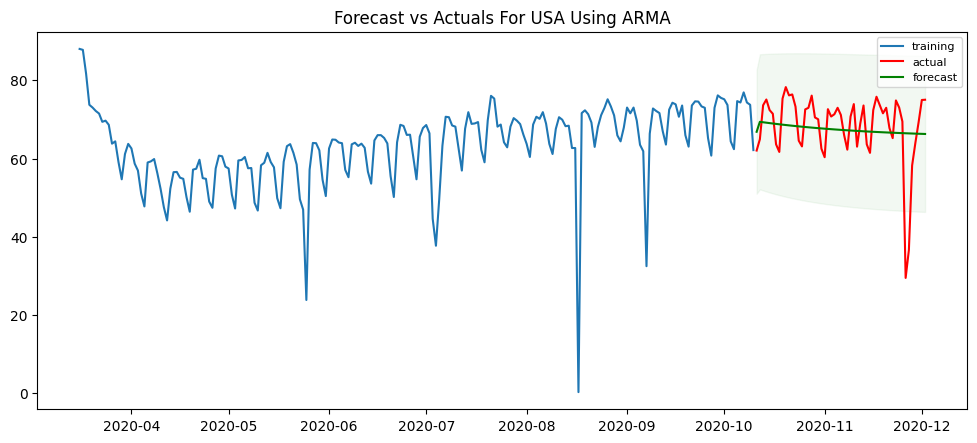

In [34]:
# Plot
mse = mean_squared_error(test_ARMA_USA, fc_ARMA_USA)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARMA_USA, fc_ARMA_USA)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARMA_USA, label='training')
plt.plot(test_ARMA_USA, label='actual',color='r')
plt.plot(fc_series_ARMA_USA, label='forecast',color='g')
plt.fill_between(lower_series_ARMA_USA.index, lower_series_ARMA_USA, upper_series_ARMA_USA,color='g', alpha=.05)
plt.title('Forecast vs Actuals For USA Using ARMA')
plt.legend(loc='best', fontsize=8)
plt.show()

#ARIMA (AutoRegressive Integrated Moving Average) Model FOR USA

In [35]:
# Create Training and Test for ARIMA
size_ARIMA_USA = int(len(df_USA['PercentOfBaseline'])*0.8)
train_ARIMA_USA = df_USA['PercentOfBaseline'].iloc[:size_ARIMA_USA]
test_ARIMA_USA = df_USA['PercentOfBaseline'].iloc[size_ARIMA_USA:]
model_ARIMA_USA = ARIMA(train_ARIMA_USA, order=(0, 1, 2), freq='D') 
fitted_ARIMA_USA = model_ARIMA_USA.fit(disp=-1)  
print(fitted_ARIMA_USA.summary())

# Forecast
fc_ARIMA_USA, se_ARIMA_USA, conf_ARIMA_USA = fitted_ARIMA_USA.forecast(len(test_ARIMA_USA), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARIMA_USA = pd.Series(fc_ARIMA_USA, index=test_ARIMA_USA.index)
lower_series_ARIMA_USA = pd.Series(conf_ARIMA_USA[:, 0], index=test_ARIMA_USA.index)
upper_series_ARIMA_USA = pd.Series(conf_ARIMA_USA[:, 1], index=test_ARIMA_USA.index)

                              ARIMA Model Results                              
Dep. Variable:     D.PercentOfBaseline   No. Observations:                  208
Model:                  ARIMA(0, 1, 2)   Log Likelihood                -731.804
Method:                        css-mle   S.D. of innovations              8.140
Date:                 Mon, 25 Jul 2022   AIC                           1471.608
Time:                         05:20:35   BIC                           1484.958
Sample:                     03-17-2020   HQIC                          1477.006
                          - 10-10-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0170      0.100     -0.170      0.865      -0.213       0.179
ma.L1.D.PercentOfBaseline    -0.5555      0.063     -8.861      0.000      -0.

Mean Squared Error: 75.712
Root Mean Squared Error: 8.701
Mean Absolute Error: 5.525


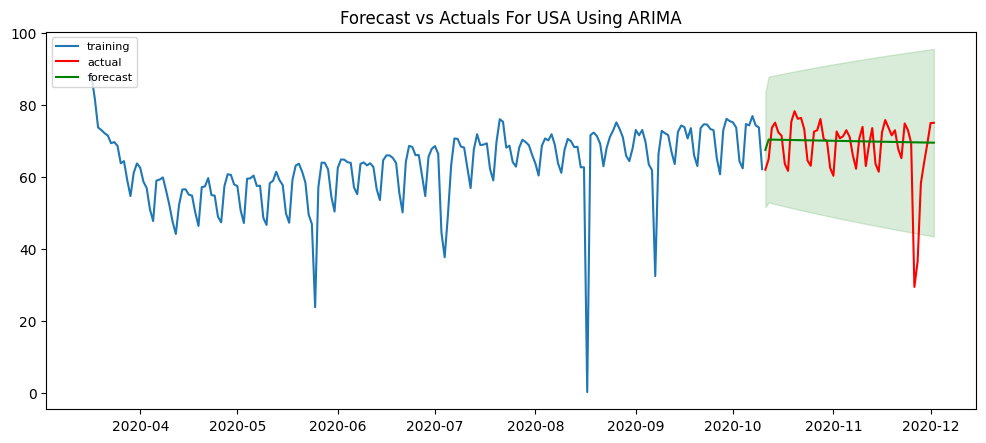

In [36]:
# Plot
mse = mean_squared_error(test_ARIMA_USA, fc_ARIMA_USA)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARIMA_USA, fc_ARIMA_USA)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARIMA_USA, label='training')
plt.plot(test_ARIMA_USA, label='actual', color='r')
plt.plot(fc_series_ARIMA_USA, label='forecast', color='g')
plt.fill_between(lower_series_ARIMA_USA.index, lower_series_ARIMA_USA, upper_series_ARIMA_USA, color='g', alpha=.15)
plt.title('Forecast vs Actuals For USA Using ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

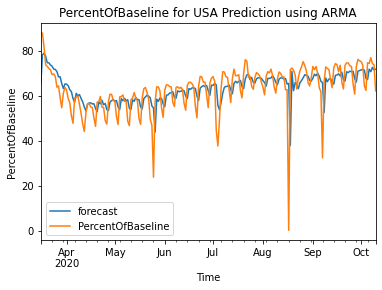

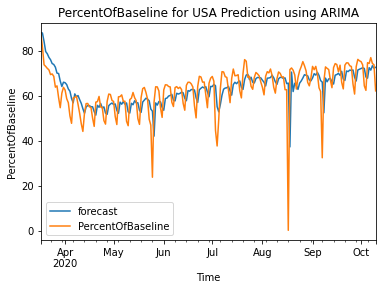

In [37]:
# Actual vs Fitted Prediction 
fitted_ARMA_USA.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for USA Prediction using ARMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')

fitted_ARIMA_USA.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for USA Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')

plt.legend()
plt.show()

#Keras Neural Network Model

*   Recurrent neural networks (RNN) Stacked LSTM (Long Short-Term Memory) Model
*   Convolutional neural networks (CNN) Conv1d dan Bidirectional LSTM

In [38]:
training_set1=df_USA['PercentOfBaseline']
training_set1=pd.DataFrame(training_set1)

In [39]:
# Feature Scaling
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [40]:
# Creating a data structure with 52 timesteps and 1 output
X_train1 = []
y_train1 = []
size_train1 = int(len(df_USA['PercentOfBaseline'])*0.2)
for i in range(size_train1, len(training_set1)):
    X_train1.append(training_set_scaled1[i-size_train1:i, 0])
    y_train1.append(training_set_scaled1[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

In [41]:
# Reshaping
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
print(X_train1.shape)

(210, 52, 1)


In [42]:
# Initialising the RNN using LSTM
model_USA_RNN = Sequential()
# Adding the LSTM layer
# Adding the output layer
# Code here
model_USA_RNN.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train1.shape[1],1)))
model_USA_RNN.add(Dropout(0.2))
model_USA_RNN.add(LSTM(50, activation="relu", return_sequences = True))
model_USA_RNN.add(LSTM(50, activation="relu", return_sequences = False))
model_USA_RNN.add(Dense(1))
model_USA_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 52, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 50)            23000     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 60,147
Trainable params: 60,147
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compiling the RNN
# Code here
model_USA_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [44]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model_USA_RNN.fit(X_train1, y_train1, epochs=epoch, batch_size=batch_size)

Epoch 1/100
7/7 [==============================] - 4s 72ms/step - loss: 0.4888 - mse: 0.4888 - mae: 0.6890
Epoch 2/100
7/7 [==============================] - 1s 79ms/step - loss: 0.1894 - mse: 0.1894 - mae: 0.3953
Epoch 3/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0538 - mse: 0.0538 - mae: 0.1810
Epoch 4/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1843
Epoch 5/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0894
Epoch 6/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0781
Epoch 7/100
7/7 [==============================] - 1s 72ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0833
Epoch 8/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0614
Epoch 9/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0675
Epoch 10/100
7/7 [===================

In [45]:
test_set1 = df_USA['PercentOfBaseline']
test_set1=pd.DataFrame(test_set1)
test_set1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [46]:
# Getting the predicted PercentOfBaseline
size_test1 = int(len(df_USA['PercentOfBaseline'])) + size_train1
dataset_total1 = pd.concat((training_set1['PercentOfBaseline'], test_set1['PercentOfBaseline']), axis = 0)
inputs1 = dataset_total1[len(dataset_total1) - len(test_set1) - size_train1:].values
inputs1 = inputs1.reshape(-1,1)
inputs1 = sc1.transform(inputs1)
X_test1 = []
for i in range(size_train1, size_test1):
    X_test1.append(inputs1[i-size_train1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_PercentOfBaseline1 = model_USA_RNN.predict(X_test1)
predicted_PercentOfBaseline1 = sc1.inverse_transform(predicted_PercentOfBaseline1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [47]:
predicted_PercentOfBaseline1=pd.DataFrame(predicted_PercentOfBaseline1)
predicted_PercentOfBaseline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


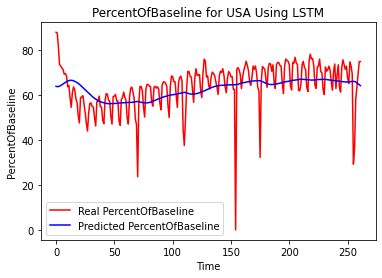

In [48]:
# Visualising the results
plt.plot(df_USA['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline1, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for USA Using LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [49]:
# Initialising the CNN using Conv1D and Bidirectional LSTM
model_USA_CNN = Sequential()
model_USA_CNN.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train1.shape[1],1)))
model_USA_CNN.add(Dropout(0.2))
model_USA_CNN.add(Bidirectional(LSTM(50,return_sequences=True)))
model_USA_CNN.add(Bidirectional(LSTM(50,return_sequences=False)))
model_USA_CNN.add(Dense(1))
model_USA_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            256       
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 52, 100)          46000     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 106,757
Trainable params: 106,757
Non-tr

In [50]:
# Compiling the CNN
# Code here
model_USA_CNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [51]:
# Fitting the RNN to the Training set
epoch = 100
batch_size = 64
model_USA_CNN.fit(X_train1, y_train1, epochs=epoch, batch_size=batch_size)

Epoch 1/100
4/4 [==============================] - 8s 120ms/step - loss: 0.4048 - mse: 0.4048 - mae: 0.6118
Epoch 2/100
4/4 [==============================] - 0s 113ms/step - loss: 0.0537 - mse: 0.0537 - mae: 0.1902
Epoch 3/100
4/4 [==============================] - 0s 118ms/step - loss: 0.0365 - mse: 0.0365 - mae: 0.1468
Epoch 4/100
4/4 [==============================] - 0s 111ms/step - loss: 0.0278 - mse: 0.0278 - mae: 0.1477
Epoch 5/100
4/4 [==============================] - 0s 117ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1636
Epoch 6/100
4/4 [==============================] - 0s 112ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0820
Epoch 7/100
4/4 [==============================] - 0s 117ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.0879
Epoch 8/100
4/4 [==============================] - 0s 110ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0727
Epoch 9/100
4/4 [==============================] - 1s 124ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0750
Epoch 10/100
4/4 [==========

In [52]:
test_set_CNN1 = df_USA['PercentOfBaseline']
test_set_CNN1=pd.DataFrame(test_set_CNN1)
test_set_CNN1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [53]:
# Getting the predicted PercentOfBaseline
size_test_CNN1 = int(len(df_USA['PercentOfBaseline'])) + size_train1
dataset_total_CNN1 = pd.concat((training_set1['PercentOfBaseline'], test_set1['PercentOfBaseline']), axis = 0)
inputs_CNN1 = dataset_total_CNN1[len(dataset_total_CNN1) - len(test_set1) - size_train1:].values
inputs_CNN1 = inputs1.reshape(-1,1)
inputs_CNN1 = sc1.transform(inputs1)
X_test_CNN1 = []
for i in range(size_train1, size_test_CNN1):
    X_test_CNN1.append(inputs1[i-size_train1:i, 0])
X_test_CNN1 = np.array(X_test_CNN1)
X_test_CNN1 = np.reshape(X_test_CNN1, (X_test_CNN1.shape[0], X_test_CNN1.shape[1], 1))
predicted_PercentOfBaseline_CNN1 = model_USA_CNN.predict(X_test_CNN1)
predicted_PercentOfBaseline_CNN1 = sc1.inverse_transform(predicted_PercentOfBaseline_CNN1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
predicted_PercentOfBaseline_CNN1=pd.DataFrame(predicted_PercentOfBaseline_CNN1)
predicted_PercentOfBaseline_CNN1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


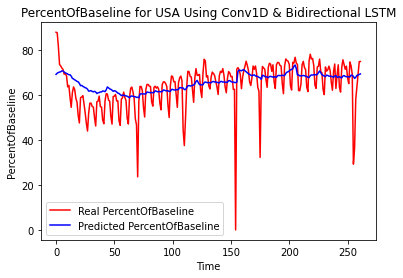

In [55]:
# Visualising the results
plt.plot(df_USA['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline_CNN1, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for USA Using Conv1D & Bidirectional LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#Dataset CANADA

In [56]:
dataset_CANADA = dataset[dataset['Country']=='Canada'].sort_values(by="Date")
dataset_CANADA.shape

(2311, 7)

In [57]:
dataset_CANADA.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
2041,2020-03-16,Hamilton International,96,Hamilton,Ontario,CA-ON,Canada
1392,2020-03-16,Winnipeg International,100,Winnipeg,Manitoba,CA-MB,Canada
1713,2020-03-16,Halifax International,72,Halifax,Nova Scotia,CA-NS,Canada
1163,2020-03-16,Vancouver International,100,Richmond,British Columbia,CA-BC,Canada
663,2020-03-16,Calgary International,100,Calgary,Alberta,CA-AB,Canada


In [58]:
dataset_CANADA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 2041 to 2121
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2311 non-null   datetime64[ns]
 1   AirportName        2311 non-null   object        
 2   PercentOfBaseline  2311 non-null   int64         
 3   City               2311 non-null   object        
 4   State              2311 non-null   object        
 5   ISO_3166_2         2311 non-null   object        
 6   Country            2311 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 144.4+ KB


In [59]:
dataset_CANADA.nunique()

Date                 262
AirportName            9
PercentOfBaseline     95
City                   9
State                  6
ISO_3166_2             6
Country                1
dtype: int64

In [60]:
df_CANADA = pd.DataFrame(dataset_CANADA.groupby('Date')['PercentOfBaseline'].mean())
df_CANADA.shape

(262, 1)

In [61]:
df_CANADA.head()

,PercentOfBaseline
Date,
2020-03-16,92.333333
2020-03-17,87.888889
2020-03-18,88.000000
2020-03-19,84.777778
2020-03-20,86.666667


In [62]:
df_CANADA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


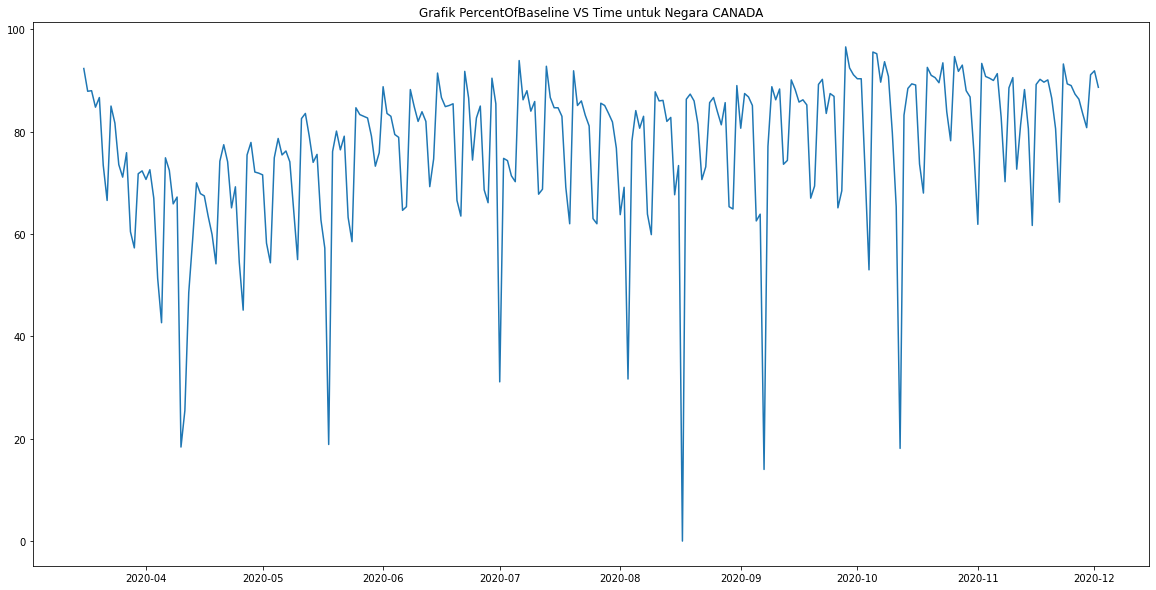

In [63]:
plt.figure(figsize=(20,10))
plt.plot(df_CANADA)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara CANADA")
plt.show()

In [64]:
print('Results of Dickey-Fuller Test:')
test_CANADA = adfuller(df_CANADA['PercentOfBaseline'], autolag='AIC')
output_CANADA = pd.Series(test_CANADA[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_CANADA[4].items():
    output_CANADA['Critical Value (%s)'%key] = value
print(output_CANADA)

Results of Dickey-Fuller Test:
Test Statistic                  -1.724863
p-value                          0.418350
#Lags Used                      13.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [65]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest_CANADA = kpss(df_CANADA['PercentOfBaseline'].dropna(), regression='c')
kpss_output_CANADA = pd.Series(kpsstest_CANADA[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest_CANADA[3].items():
    kpss_output_CANADA['Critical Value (%s)'%key] = value
print (kpss_output_CANADA)

Results of KPSS Test:
Test Statistic            0.896685
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


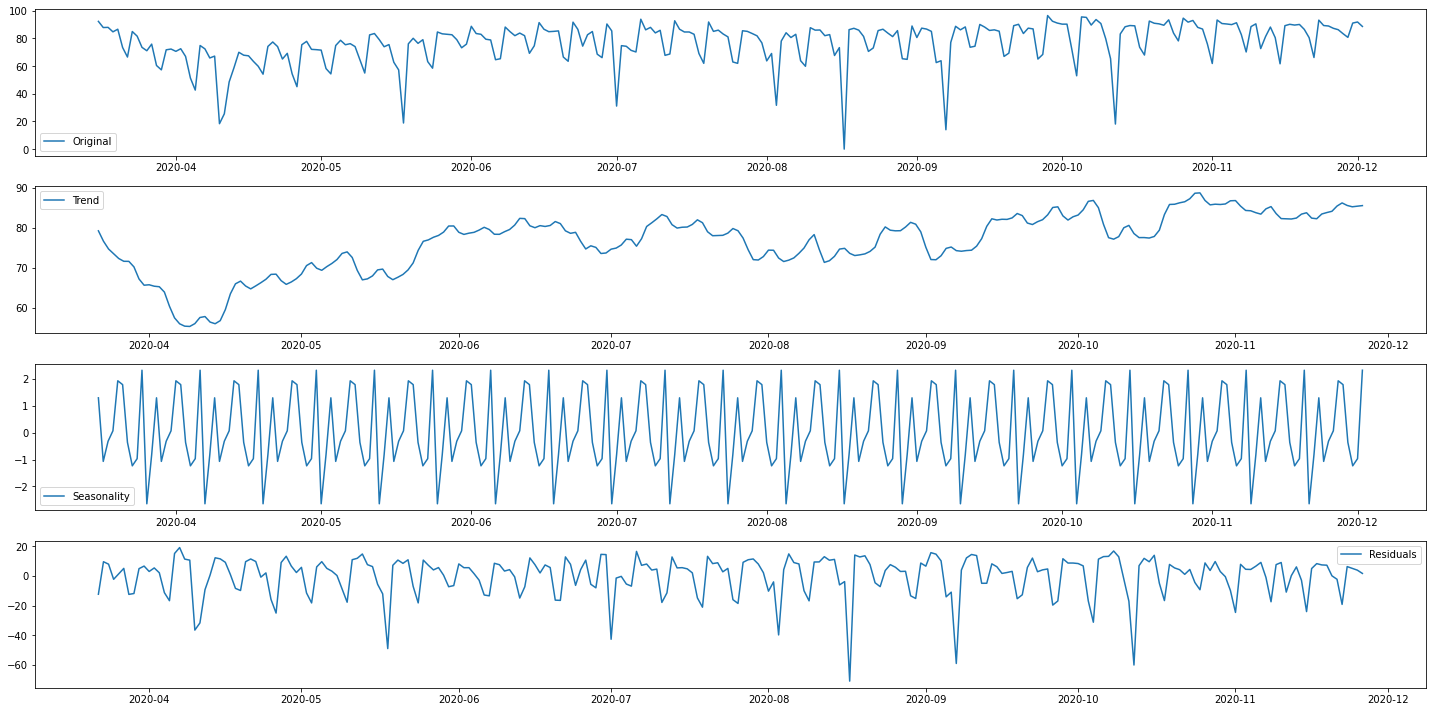

In [66]:
decomposition_CANADA = seasonal_decompose(df_CANADA.dropna(), model='additive', freq=12)

trend2 = decomposition_CANADA.trend
seasonal2 = decomposition_CANADA.seasonal
residual2 = decomposition_CANADA.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_CANADA['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

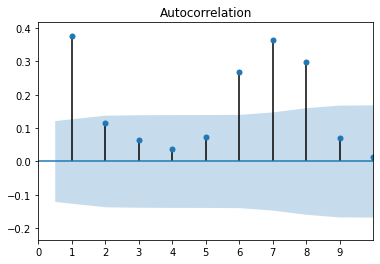

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_CANADA['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

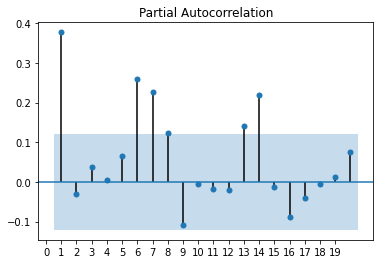

In [68]:
plot_pacf(df_CANADA['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

#ARMA (Auto Regressive Moving Average) Model FOR CANADA

In [69]:
# Create Training and Test for ARMA
size_ARMA_CANADA = int(len(df_CANADA['PercentOfBaseline'])*0.8)
train_ARMA_CANADA = df_CANADA['PercentOfBaseline'].iloc[:size_ARMA_CANADA]
test_ARMA_CANADA = df_CANADA['PercentOfBaseline'].iloc[size_ARMA_CANADA:]
# Build Model
model_ARMA_CANADA = ARMA(train_ARMA_CANADA, order=(1,2), freq='D')  
fitted_ARMA_CANADA = model_ARMA_CANADA.fit() 
print(fitted_ARMA_CANADA.summary())

# Forecast
fc_ARMA_CANADA, se_ARMA_CANADA, conf_ARMA_CANADA = fitted_ARMA_CANADA.forecast(len(test_ARMA_CANADA), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARMA_CANADA = pd.Series(fc_ARMA_CANADA, index=test_ARMA_CANADA.index)
lower_series_ARMA_CANADA = pd.Series(conf_ARMA_CANADA[:, 0], index=test_ARMA_CANADA.index)
upper_series_ARMA_CANADA = pd.Series(conf_ARMA_CANADA[:, 1], index=test_ARMA_CANADA.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -844.402
Method:                       css-mle   S.D. of innovations             13.742
Date:                Mon, 25 Jul 2022   AIC                           1698.804
Time:                        05:23:38   BIC                           1715.516
Sample:                    03-16-2020   HQIC                          1705.561
                         - 10-10-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      75.8541      2.944     25.763      0.000      70.083      81.625
ar.L1.PercentOfBaseline     0.9632      0.034     28.355      0.000       0.897       1.030


Mean Squared Error: 194.935
Root Mean Squared Error: 13.962
Mean Absolute Error: 11.305


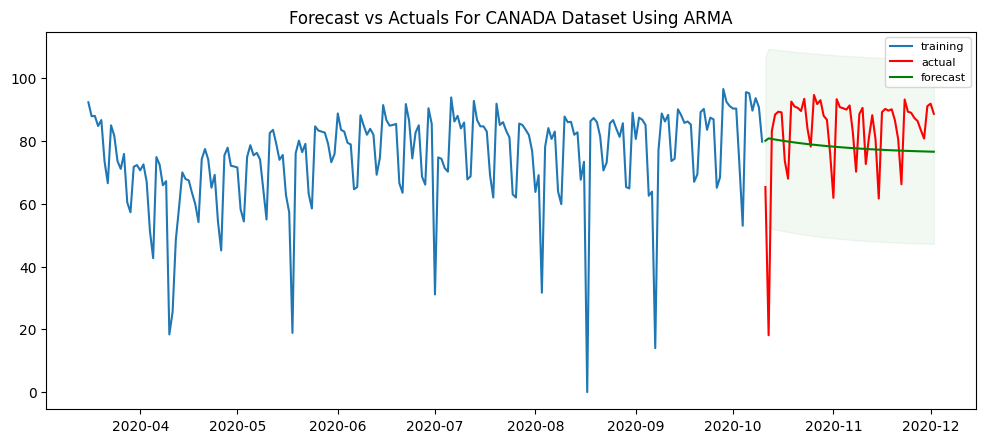

In [70]:
# Plot
mse = mean_squared_error(test_ARMA_CANADA, fc_ARMA_CANADA)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARMA_CANADA, fc_ARMA_CANADA)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARMA_CANADA, label='training')
plt.plot(test_ARMA_CANADA, label='actual',color='r')
plt.plot(fc_series_ARMA_CANADA, label='forecast',color='g')
plt.fill_between(lower_series_ARMA_CANADA.index, lower_series_ARMA_CANADA, upper_series_ARMA_CANADA,color='g', alpha=.05)
plt.title('Forecast vs Actuals For CANADA Dataset Using ARMA')
plt.legend(loc='best', fontsize=8)
plt.show()

#ARIMA (AutoRegressive Integrated Moving Average) Model FOR CANADA

In [71]:
# Create Training and Test for ARIMA
size_ARIMA_CANADA = int(len(df_CANADA['PercentOfBaseline'])*0.8)
train_ARIMA_CANADA = df_CANADA['PercentOfBaseline'].iloc[:size_ARIMA_CANADA]
test_ARIMA_CANADA = df_CANADA['PercentOfBaseline'].iloc[size_ARIMA_CANADA:]
model_ARIMA_CANADA = ARIMA(train_ARIMA_CANADA, order=(0, 1, 2), freq='D') 
fitted_ARIMA_CANADA = model_ARIMA_CANADA.fit(disp=-1)  
print(fitted_ARIMA_CANADA.summary())

# Forecast
fc_ARIMA_CANADA, se_ARIMA_CANADA, conf_ARIMA_CANADA = fitted_ARIMA_CANADA.forecast(len(test_ARIMA_CANADA), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARIMA_CANADA = pd.Series(fc_ARIMA_CANADA, index=test_ARIMA_CANADA.index)
lower_series_ARIMA_CANADA = pd.Series(conf_ARIMA_CANADA[:, 0], index=test_ARIMA_CANADA.index)
upper_series_ARIMA_CANADA = pd.Series(conf_ARIMA_CANADA[:, 1], index=test_ARIMA_CANADA.index)

                              ARIMA Model Results                              
Dep. Variable:     D.PercentOfBaseline   No. Observations:                  208
Model:                  ARIMA(0, 1, 2)   Log Likelihood                -841.685
Method:                        css-mle   S.D. of innovations             13.679
Date:                 Mon, 25 Jul 2022   AIC                           1691.370
Time:                         05:23:39   BIC                           1704.720
Sample:                     03-17-2020   HQIC                          1696.768
                          - 10-10-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0693      0.021      3.360      0.001       0.029       0.110
ma.L1.D.PercentOfBaseline    -0.6806      0.065    -10.427      0.000      -0.

Mean Squared Error: 150.222
Root Mean Squared Error: 12.257
Mean Absolute Error: 8.070


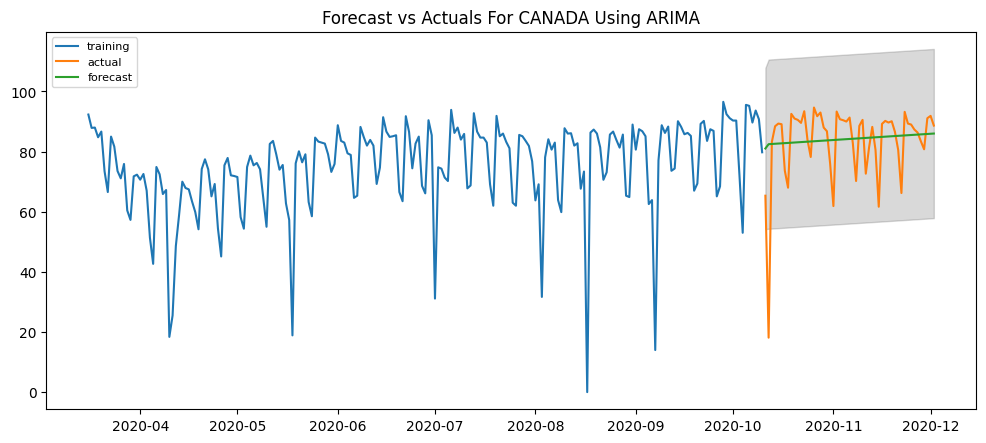

In [72]:
# Plot
mse = mean_squared_error(test_ARIMA_CANADA, fc_ARIMA_CANADA)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARIMA_CANADA, fc_ARIMA_CANADA)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARIMA_CANADA, label='training')
plt.plot(test_ARIMA_CANADA, label='actual')
plt.plot(fc_series_ARIMA_CANADA, label='forecast')
plt.fill_between(lower_series_ARIMA_CANADA.index, lower_series_ARIMA_CANADA, upper_series_ARIMA_CANADA, color='k', alpha=.15)
plt.title('Forecast vs Actuals For CANADA Using ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

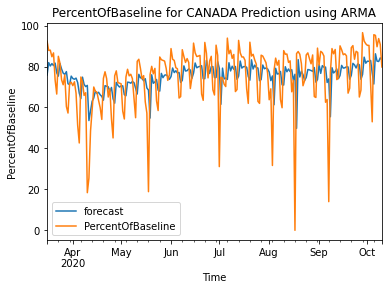

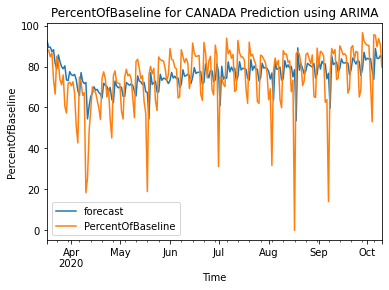

In [73]:
# Actual vs Fitted Prediction 
fitted_ARMA_CANADA.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for CANADA Prediction using ARMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')

fitted_ARIMA_CANADA.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for CANADA Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#Keras Neural Network Model

*   Recurrent neural networks (RNN) Stacked LSTM (Long Short-Term Memory) Model
*   Convolutional neural networks (CNN) Conv1d dan Bidirectional LSTM

In [74]:
training_set2=df_CANADA['PercentOfBaseline']
training_set2=pd.DataFrame(training_set2)

In [75]:
# Feature Scaling
sc2 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc2.fit_transform(training_set2)

In [76]:
# Creating a data structure with 52 timesteps and 1 output
X_train2 = []
y_train2 = []
size_train2 = int(len(df_CANADA['PercentOfBaseline'])*0.2)
for i in range(size_train2, len(training_set2)):
    X_train2.append(training_set_scaled2[i-size_train2:i, 0])
    y_train2.append(training_set_scaled2[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

# Reshaping
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
print(X_train2.shape)

(210, 52, 1)


In [77]:
# Initialising the RNN using LSTM
model_CANADA_RNN = Sequential()
# Adding the LSTM layer
# Adding the output layer
# Code here
model_CANADA_RNN.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train2.shape[1],1)))
model_CANADA_RNN.add(Dropout(0.2))
model_CANADA_RNN.add(LSTM(50, activation="relu", return_sequences = True))
model_CANADA_RNN.add(LSTM(50, activation="relu", return_sequences = False))
model_CANADA_RNN.add(Dense(1))
model_CANADA_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 52, 64)            16896     
                                                                 
 dropout_2 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_6 (LSTM)               (None, 52, 50)            23000     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 60,147
Trainable params: 60,147
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compiling the RNN
# Code here
model_CANADA_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [79]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model_CANADA_RNN.fit(X_train2, y_train2, epochs=epoch, batch_size=batch_size)

Epoch 1/100
7/7 [==============================] - 4s 71ms/step - loss: 0.6422 - mse: 0.6422 - mae: 0.7878
Epoch 2/100
7/7 [==============================] - 1s 80ms/step - loss: 0.3123 - mse: 0.3123 - mae: 0.5233
Epoch 3/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0606 - mse: 0.0606 - mae: 0.2021
Epoch 4/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0540 - mse: 0.0540 - mae: 0.2036
Epoch 5/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0302 - mse: 0.0302 - mae: 0.1122
Epoch 6/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1219
Epoch 7/100
7/7 [==============================] - 1s 78ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1094
Epoch 8/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1050
Epoch 9/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1122
Epoch 10/100
7/7 [===================

In [80]:
test_set2 = df_CANADA['PercentOfBaseline']
test_set2=pd.DataFrame(test_set2)

In [81]:
test_set2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [82]:
# Getting the predicted PercentOfBaseline
size_test2 = int(len(df_CANADA['PercentOfBaseline'])) + size_train2
dataset_total2 = pd.concat((training_set2['PercentOfBaseline'], test_set2['PercentOfBaseline']), axis = 0)
inputs2 = dataset_total2[len(dataset_total2) - len(test_set2) - size_train2:].values
inputs2 = inputs2.reshape(-1,1)
inputs2 = sc2.transform(inputs2)
X_test2 = []
for i in range(size_train2, size_test2):
    X_test2.append(inputs2[i-size_train2:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
predicted_PercentOfBaseline2 = model_CANADA_RNN.predict(X_test2)
predicted_PercentOfBaseline2 = sc2.inverse_transform(predicted_PercentOfBaseline2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [83]:
predicted_PercentOfBaseline2=pd.DataFrame(predicted_PercentOfBaseline2)
predicted_PercentOfBaseline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


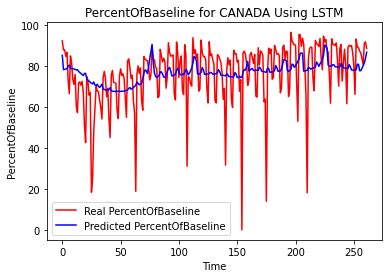

In [84]:
# Visualising the results
plt.plot(df_CANADA['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline2, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for CANADA Using LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [85]:
# Initialising the CNN using Conv1D and Bidirectional LSTM
model_CANADA_CNN = Sequential()
model_CANADA_CNN.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train2.shape[1],1)))
model_CANADA_CNN.add(Dropout(0.2))
model_CANADA_CNN.add(Bidirectional(LSTM(50,return_sequences=True)))
model_CANADA_CNN.add(Bidirectional(LSTM(50,return_sequences=False)))
model_CANADA_CNN.add(Dense(1))
model_CANADA_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 52, 64)            256       
                                                                 
 dropout_3 (Dropout)         (None, 52, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 52, 100)          46000     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 106,757
Trainable params: 106,757
Non-tr

In [86]:
# Compiling the CNN
# Code here
model_CANADA_CNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [87]:
# Fitting the RNN to the Training set
epoch = 100
batch_size = 64
model_CANADA_CNN.fit(X_train2, y_train2, epochs=epoch, batch_size=batch_size)

Epoch 1/100
4/4 [==============================] - 8s 113ms/step - loss: 0.7816 - mse: 0.7816 - mae: 0.8612
Epoch 2/100
4/4 [==============================] - 0s 109ms/step - loss: 0.1218 - mse: 0.1218 - mae: 0.3100
Epoch 3/100
4/4 [==============================] - 0s 113ms/step - loss: 0.0967 - mse: 0.0967 - mae: 0.2722
Epoch 4/100
4/4 [==============================] - 0s 117ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1199
Epoch 5/100
4/4 [==============================] - 0s 114ms/step - loss: 0.0469 - mse: 0.0469 - mae: 0.1901
Epoch 6/100
4/4 [==============================] - 1s 200ms/step - loss: 0.0405 - mse: 0.0405 - mae: 0.1751
Epoch 7/100
4/4 [==============================] - 1s 165ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.1081
Epoch 8/100
4/4 [==============================] - 0s 112ms/step - loss: 0.0295 - mse: 0.0295 - mae: 0.1056
Epoch 9/100
4/4 [==============================] - 0s 116ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1000
Epoch 10/100
4/4 [==========

In [88]:
test_set_CNN2 = df_CANADA['PercentOfBaseline']
test_set_CNN2=pd.DataFrame(test_set_CNN2)
test_set_CNN2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [89]:
# Getting the predicted PercentOfBaseline
size_test_CNN2 = int(len(df_CANADA['PercentOfBaseline'])) + size_train2
dataset_total_CNN2 = pd.concat((training_set2['PercentOfBaseline'], test_set2['PercentOfBaseline']), axis = 0)
inputs_CNN2 = dataset_total_CNN2[len(dataset_total_CNN2) - len(test_set2) - size_train2:].values
inputs_CNN2 = inputs2.reshape(-1,1)
inputs_CNN2 = sc1.transform(inputs2)
X_test_CNN2 = []
for i in range(size_train2, size_test_CNN2):
    X_test_CNN2.append(inputs2[i-size_train2:i, 0])
X_test_CNN2 = np.array(X_test_CNN2)
X_test_CNN2 = np.reshape(X_test_CNN2, (X_test_CNN2.shape[0], X_test_CNN2.shape[1], 1))
predicted_PercentOfBaseline_CNN2 = model_CANADA_CNN.predict(X_test_CNN2)
predicted_PercentOfBaseline_CNN2 = sc2.inverse_transform(predicted_PercentOfBaseline_CNN2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [90]:
predicted_PercentOfBaseline_CNN2=pd.DataFrame(predicted_PercentOfBaseline_CNN2)
predicted_PercentOfBaseline_CNN2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


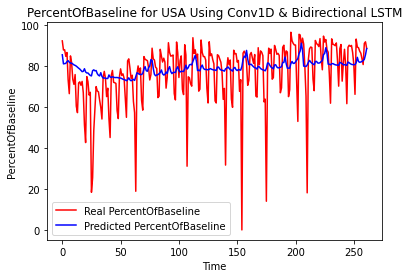

In [91]:
# Visualising the results
plt.plot(df_CANADA['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline_CNN2, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for USA Using Conv1D & Bidirectional LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#DATASET AUSTRALIA

In [92]:
dataset_Australia = dataset[dataset['Country']=='Australia'].sort_values(by="Date")
dataset_Australia.shape

(257, 7)

In [93]:
dataset_Australia.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
171,2020-03-16,Kingsford Smith,92,Sydney,New South Wales,AU,Australia
31,2020-03-17,Kingsford Smith,90,Sydney,New South Wales,AU,Australia
129,2020-03-18,Kingsford Smith,97,Sydney,New South Wales,AU,Australia
84,2020-03-19,Kingsford Smith,89,Sydney,New South Wales,AU,Australia
65,2020-03-20,Kingsford Smith,85,Sydney,New South Wales,AU,Australia


In [94]:
dataset_Australia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 171 to 198
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               257 non-null    datetime64[ns]
 1   AirportName        257 non-null    object        
 2   PercentOfBaseline  257 non-null    int64         
 3   City               257 non-null    object        
 4   State              257 non-null    object        
 5   ISO_3166_2         257 non-null    object        
 6   Country            257 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 16.1+ KB


In [95]:
dataset_Australia.nunique()

Date                 257
AirportName            1
PercentOfBaseline     65
City                   1
State                  1
ISO_3166_2             1
Country                1
dtype: int64

In [96]:
df_Australia = pd.DataFrame(dataset_Australia.groupby('Date')['PercentOfBaseline'].mean())
df_Australia.shape

(257, 1)

In [97]:
df_Australia.head()

,PercentOfBaseline
Date,
2020-03-16,92.0
2020-03-17,90.0
2020-03-18,97.0
2020-03-19,89.0
2020-03-20,85.0


In [98]:
df_Australia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


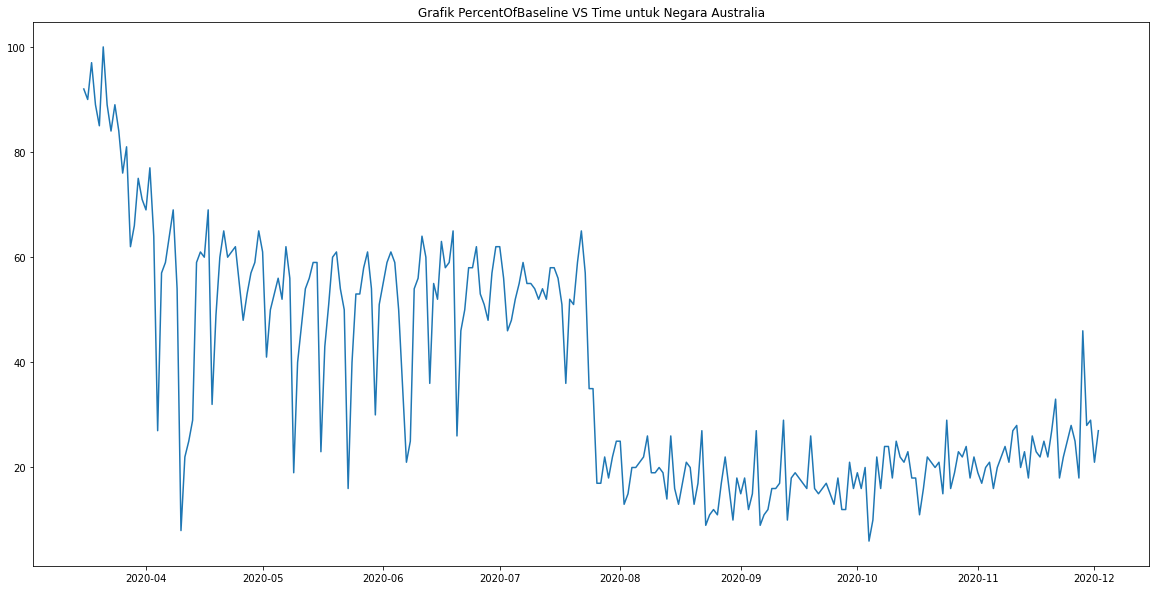

In [99]:
plt.figure(figsize=(20,10))
plt.plot(df_Australia)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara Australia")
plt.show()

In [100]:
print('Results of Dickey-Fuller Test:')
test_Australia = adfuller(df_Australia['PercentOfBaseline'], autolag='AIC')
output_Australia = pd.Series(test_Australia[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_Australia[4].items():
    output_Australia['Critical Value (%s)'%key] = value
print(output_Australia)

Results of Dickey-Fuller Test:
Test Statistic                  -2.770638
p-value                          0.062592
#Lags Used                       8.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [101]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest_Australia = kpss(df_Australia['PercentOfBaseline'].dropna(), regression='c')
kpss_output_Australia = pd.Series(kpsstest_Australia[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest_Australia[3].items():
    kpss_output_Australia['Critical Value (%s)'%key] = value
print (kpss_output_Australia)

Results of KPSS Test:
Test Statistic            1.287648
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


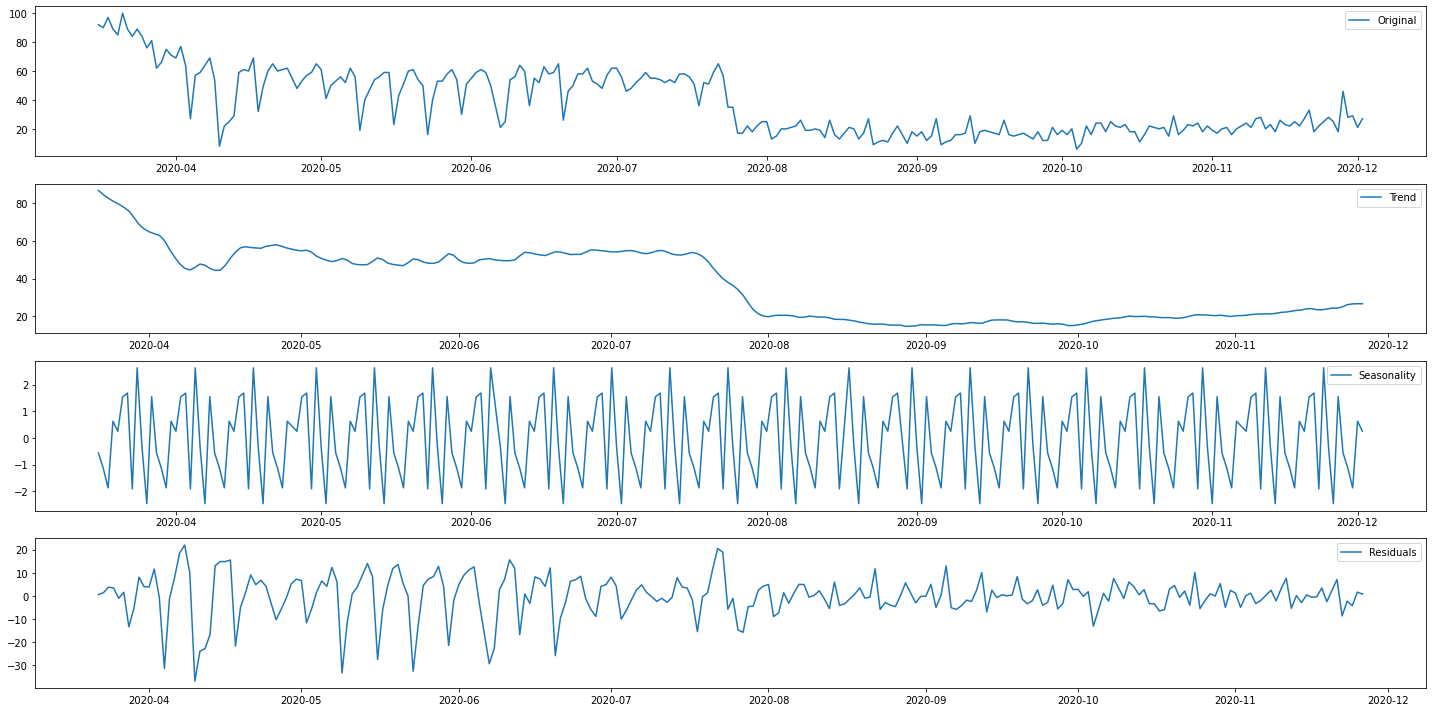

In [102]:
decomposition_Australia = seasonal_decompose(df_Australia.dropna(), model='additive', freq=12)

trend3 = decomposition_Australia.trend
seasonal3 = decomposition_Australia.seasonal
residual3 = decomposition_Australia.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_Australia['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

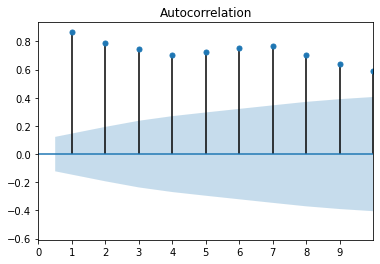

In [103]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_Australia['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

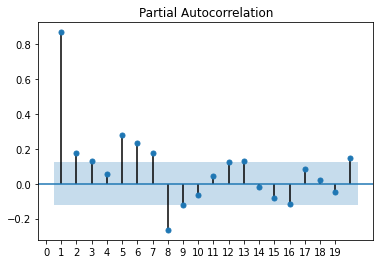

In [104]:
plot_pacf(df_Australia['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

#ARMA (Auto Regressive Moving Average) Model FOR AUSTRALIA

In [105]:
# Create Training and Test for ARMA
size_ARMA_Australia = int(len(df_Australia['PercentOfBaseline'])*0.8)
train_ARMA_Australia = df_Australia['PercentOfBaseline'].iloc[:size_ARMA_Australia]
test_ARMA_Australia = df_Australia['PercentOfBaseline'].iloc[size_ARMA_Australia:]
# Build Model
model_ARMA_Australia = ARMA(train_ARMA_Australia, order=(1,2))  
fitted_ARMA_Australia = model_ARMA_Australia.fit() 
print(fitted_ARMA_Australia.summary())

# Forecast
fc_ARMA_Australia, se_ARMA_Australia, conf_ARMA_Australia = fitted_ARMA_Australia.forecast(len(test_ARMA_Australia), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARMA_Australia = pd.Series(fc_ARMA_Australia, index=test_ARMA_Australia.index)
lower_series_ARMA_Australia = pd.Series(conf_ARMA_Australia[:, 0], index=test_ARMA_Australia.index)
upper_series_ARMA_Australia = pd.Series(conf_ARMA_Australia[:, 1], index=test_ARMA_Australia.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  205
Model:                     ARMA(1, 2)   Log Likelihood                -773.001
Method:                       css-mle   S.D. of innovations             10.438
Date:                Mon, 25 Jul 2022   AIC                           1556.001
Time:                        05:25:43   BIC                           1572.616
Sample:                             0   HQIC                          1562.722
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      49.0541     22.373      2.193      0.029       5.204      92.904
ar.L1.PercentOfBaseline     0.9933      0.008    123.771      0.000       0.978       1.009


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Mean Squared Error: 25.038
Root Mean Squared Error: 5.004
Mean Absolute Error: 3.753


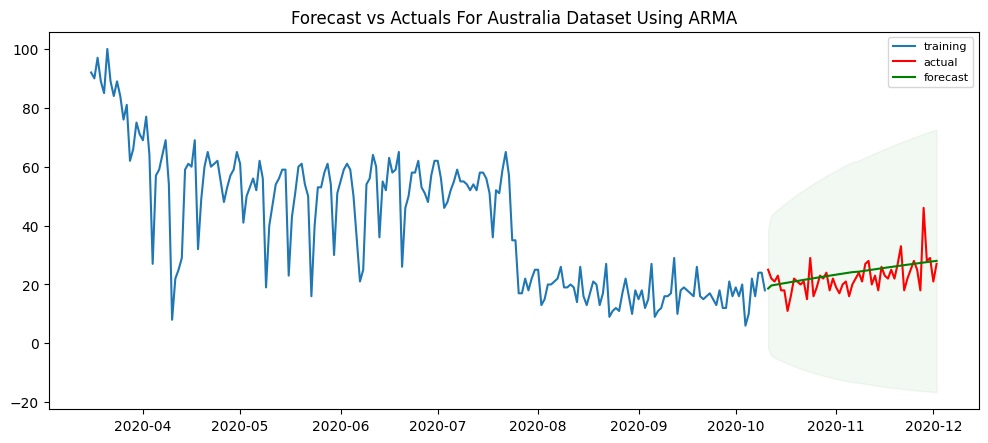

In [106]:
# Plot
mse = mean_squared_error(test_ARMA_Australia, fc_ARMA_Australia)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARMA_Australia, fc_ARMA_Australia)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARMA_Australia, label='training')
plt.plot(test_ARMA_Australia, label='actual',color='r')
plt.plot(fc_series_ARMA_Australia, label='forecast',color='g')
plt.fill_between(lower_series_ARMA_Australia.index, lower_series_ARMA_Australia, upper_series_ARMA_Australia,color='g', alpha=.05)
plt.title('Forecast vs Actuals For Australia Dataset Using ARMA')
plt.legend(loc='best', fontsize=8)
plt.show()

#ARIMA (AutoRegressive Integrated Moving Average) Model FOR Australia

In [107]:
# Create Training and Test for ARIMA
size_ARIMA_Australia = int(len(df_Australia['PercentOfBaseline'])*0.8)
train_ARIMA_Australia = df_Australia['PercentOfBaseline'].iloc[:size_ARIMA_Australia]
test_ARIMA_Australia = df_Australia['PercentOfBaseline'].iloc[size_ARIMA_Australia:]
model_ARIMA_Australia = ARIMA(train_ARIMA_Australia, order=(0, 1, 2)) 
fitted_ARIMA_Australia = model_ARIMA_Australia.fit(disp=-1)  
print(fitted_ARIMA_Australia.summary())

# Forecast
fc_ARIMA_Australia, se_ARIMA_Australia, conf_ARIMA_Australia = fitted_ARIMA_Australia.forecast(len(test_ARIMA_Australia), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARIMA_Australia = pd.Series(fc_ARIMA_Australia, index=test_ARIMA_Australia.index)
lower_series_ARIMA_Australia = pd.Series(conf_ARIMA_Australia[:, 0], index=test_ARIMA_Australia.index)
upper_series_ARIMA_Australia = pd.Series(conf_ARIMA_Australia[:, 1], index=test_ARIMA_Australia.index)

                              ARIMA Model Results                              
Dep. Variable:     D.PercentOfBaseline   No. Observations:                  204
Model:                  ARIMA(0, 1, 2)   Log Likelihood                -767.017
Method:                        css-mle   S.D. of innovations             10.375
Date:                 Mon, 25 Jul 2022   AIC                           1542.033
Time:                         05:25:43   BIC                           1555.306
Sample:                              1   HQIC                          1547.402
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3594      0.205     -1.753      0.081      -0.761       0.042
ma.L1.D.PercentOfBaseline    -0.4133      0.067     -6.153      0.000      -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Mean Squared Error: 305.690
Root Mean Squared Error: 17.484
Mean Absolute Error: 15.019


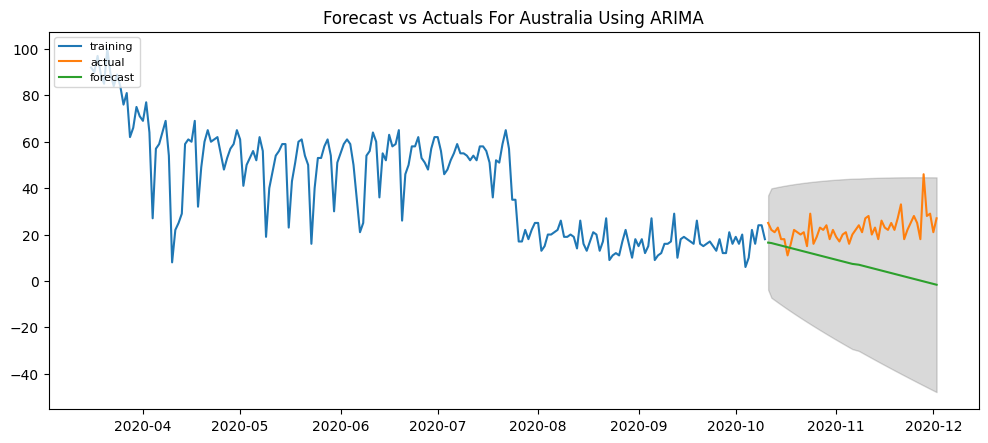

In [108]:
# Plot
mse = mean_squared_error(test_ARIMA_Australia, fc_ARIMA_Australia)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARIMA_Australia, fc_ARIMA_Australia)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARIMA_Australia, label='training')
plt.plot(test_ARIMA_Australia, label='actual')
plt.plot(fc_series_ARIMA_Australia, label='forecast')
plt.fill_between(lower_series_ARIMA_Australia.index, lower_series_ARIMA_Australia, upper_series_ARIMA_Australia, color='k', alpha=.15)
plt.title('Forecast vs Actuals For Australia Using ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

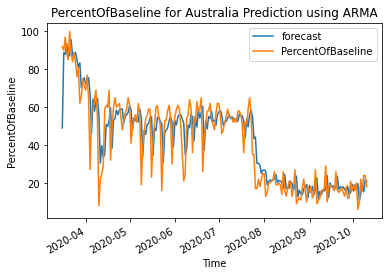

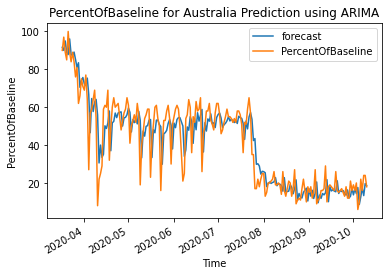

In [109]:
# Actual vs Fitted Prediction 
fitted_ARMA_Australia.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for Australia Prediction using ARMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
fitted_ARIMA_Australia.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for Australia Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#Keras Neural Network Model

*   Recurrent neural networks (RNN) Stacked LSTM (Long Short-Term Memory) Model
*   Convolutional neural networks (CNN) Conv1d dan Bidirectional LSTM

In [110]:
training_set3=df_Australia['PercentOfBaseline']
training_set3=pd.DataFrame(training_set3)

In [111]:
# Feature Scaling
sc3 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled3 = sc3.fit_transform(training_set3)

In [112]:
# Creating a data structure with 51 timesteps and 1 output
X_train3 = []
y_train3 = []
size_train3 = int(len(df_Australia['PercentOfBaseline'])*0.2)
for i in range(size_train3, len(training_set3)):
    X_train3.append(training_set_scaled3[i-size_train3:i, 0])
    y_train3.append(training_set_scaled3[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

# Reshaping
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))
print(X_train3.shape)

(206, 51, 1)


In [113]:
# Initialising the RNN using LSTM
model_Australia_RNN = Sequential()
# Adding the LSTM layer
# Adding the output layer
# Code here
model_Australia_RNN.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train3.shape[1],1)))
model_Australia_RNN.add(Dropout(0.2))
model_Australia_RNN.add(LSTM(50, activation="relu", return_sequences = True))
model_Australia_RNN.add(LSTM(50, activation="relu", return_sequences = False))
model_Australia_RNN.add(Dense(1))
model_Australia_RNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 51, 64)            16896     
                                                                 
 dropout_4 (Dropout)         (None, 51, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 51, 50)            23000     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 60,147
Trainable params: 60,147
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Compiling the RNN
# Code here
model_Australia_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [115]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model_Australia_RNN.fit(X_train3, y_train3, epochs=epoch, batch_size=batch_size)

Epoch 1/100
7/7 [==============================] - 5s 85ms/step - loss: 0.0910 - mse: 0.0910 - mae: 0.2419
Epoch 2/100
7/7 [==============================] - 1s 79ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1386
Epoch 3/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1174
Epoch 4/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1111
Epoch 5/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.1061
Epoch 6/100
7/7 [==============================] - 0s 71ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0999
Epoch 7/100
7/7 [==============================] - 1s 71ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0931
Epoch 8/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0812
Epoch 9/100
7/7 [==============================] - 1s 73ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0904
Epoch 10/100
7/7 [===================

In [116]:
test_set3 = df_Australia['PercentOfBaseline']
test_set3=pd.DataFrame(test_set3)

In [117]:
test_set3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [118]:
# Getting the predicted PercentOfBaseline
size_test3 = int(len(df_Australia['PercentOfBaseline'])) + size_train3
dataset_total3 = pd.concat((training_set3['PercentOfBaseline'], test_set3['PercentOfBaseline']), axis = 0)
inputs3 = dataset_total3[len(dataset_total3) - len(test_set3) - size_train3:].values
inputs3 = inputs3.reshape(-1,1)
inputs3 = sc3.transform(inputs3)
X_test3 = []
for i in range(size_train3, size_test3):
    X_test3.append(inputs3[i-size_train3:i, 0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
predicted_PercentOfBaseline3 = model_Australia_RNN.predict(X_test3)
predicted_PercentOfBaseline3 = sc3.inverse_transform(predicted_PercentOfBaseline3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [119]:
predicted_PercentOfBaseline3=pd.DataFrame(predicted_PercentOfBaseline3)
predicted_PercentOfBaseline3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


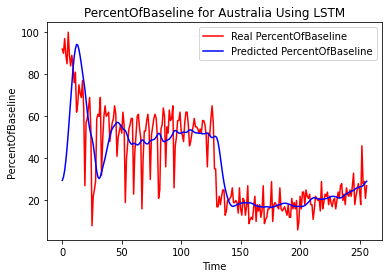

In [120]:
# Visualising the results
plt.plot(df_Australia['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline3, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for Australia Using LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [121]:
# Initialising the CNN using Conv1D and Bidirectional LSTM
model_Australia_CNN = Sequential()
model_Australia_CNN.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train3.shape[1],1)))
model_Australia_CNN.add(Dropout(0.2))
model_Australia_CNN.add(Bidirectional(LSTM(50,return_sequences=True)))
model_Australia_CNN.add(Bidirectional(LSTM(50,return_sequences=False)))
model_Australia_CNN.add(Dense(1))
model_Australia_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 51, 64)            256       
                                                                 
 dropout_5 (Dropout)         (None, 51, 64)            0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 51, 100)          46000     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 106,757
Trainable params: 106,757
Non-tr

In [122]:
# Compiling the CNN
# Code here
model_Australia_CNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [123]:
# Fitting the RNN to the Training set
epoch = 100
batch_size = 64
model_Australia_CNN.fit(X_train3, y_train3, epochs=epoch, batch_size=batch_size)

Epoch 1/100
4/4 [==============================] - 8s 112ms/step - loss: 0.0744 - mse: 0.0744 - mae: 0.2105
Epoch 2/100
4/4 [==============================] - 0s 115ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1267
Epoch 3/100
4/4 [==============================] - 0s 109ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0990
Epoch 4/100
4/4 [==============================] - 0s 115ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.1042
Epoch 5/100
4/4 [==============================] - 0s 108ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0994
Epoch 6/100
4/4 [==============================] - 0s 109ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0871
Epoch 7/100
4/4 [==============================] - 0s 114ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0848
Epoch 8/100
4/4 [==============================] - 0s 110ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0814
Epoch 9/100
4/4 [==============================] - 0s 110ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0813
Epoch 10/100
4/4 [==========

In [124]:
test_set_CNN3 = df_Australia['PercentOfBaseline']
test_set_CNN3=pd.DataFrame(test_set_CNN3)
test_set_CNN3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [125]:
# Getting the predicted PercentOfBaseline
size_test_CNN3 = int(len(df_Australia['PercentOfBaseline'])) + size_train3
dataset_total_CNN3 = pd.concat((training_set3['PercentOfBaseline'], test_set3['PercentOfBaseline']), axis = 0)
inputs_CNN3 = dataset_total_CNN3[len(dataset_total_CNN3) - len(test_set3) - size_train3:].values
inputs_CNN3 = inputs_CNN3.reshape(-1,1)
inputs_CNN3 = sc3.transform(inputs3)
X_test_CNN3 = []
for i in range(size_train3, size_test_CNN3):
    X_test_CNN3.append(inputs3[i-size_train3:i, 0])
X_test_CNN3 = np.array(X_test_CNN3)
X_test_CNN3 = np.reshape(X_test_CNN3, (X_test_CNN3.shape[0], X_test_CNN3.shape[1], 1))
predicted_PercentOfBaseline_CNN3 = model_Australia_CNN.predict(X_test_CNN3)
predicted_PercentOfBaseline_CNN3 = sc3.inverse_transform(predicted_PercentOfBaseline_CNN3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [126]:
predicted_PercentOfBaseline_CNN3=pd.DataFrame(predicted_PercentOfBaseline_CNN3)
predicted_PercentOfBaseline_CNN3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


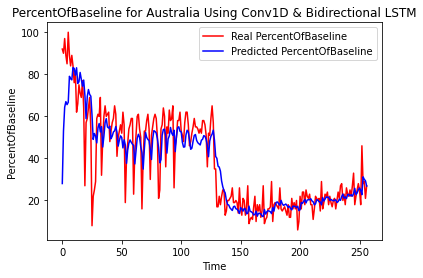

In [127]:
# Visualising the results
plt.plot(df_Australia['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline_CNN3, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for Australia Using Conv1D & Bidirectional LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#DATASET CHILE

In [128]:
dataset_Chile = dataset[dataset['Country']=='Chile'].sort_values(by="Date")
dataset_Chile.shape

(238, 7)

In [129]:
dataset_Chile.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country
302,2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,CL,Chile
257,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,CL,Chile
393,2020-03-18,Santiago International Airport,56,Santiago,Santiago Province,CL,Chile
473,2020-03-19,Santiago International Airport,52,Santiago,Santiago Province,CL,Chile
414,2020-03-20,Santiago International Airport,53,Santiago,Santiago Province,CL,Chile


In [130]:
dataset_Chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 302 to 338
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               238 non-null    datetime64[ns]
 1   AirportName        238 non-null    object        
 2   PercentOfBaseline  238 non-null    int64         
 3   City               238 non-null    object        
 4   State              238 non-null    object        
 5   ISO_3166_2         238 non-null    object        
 6   Country            238 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 14.9+ KB


In [131]:
dataset_Chile.nunique()

Date                 238
AirportName            1
PercentOfBaseline     61
City                   1
State                  1
ISO_3166_2             1
Country                1
dtype: int64

In [132]:
df_Chile = pd.DataFrame(dataset_Chile.groupby('Date')['PercentOfBaseline'].mean())
df_Chile.shape

(238, 1)

In [133]:
df_Chile.head()

,PercentOfBaseline
Date,
2020-03-16,96.0
2020-03-17,72.0
2020-03-18,56.0
2020-03-19,52.0
2020-03-20,53.0


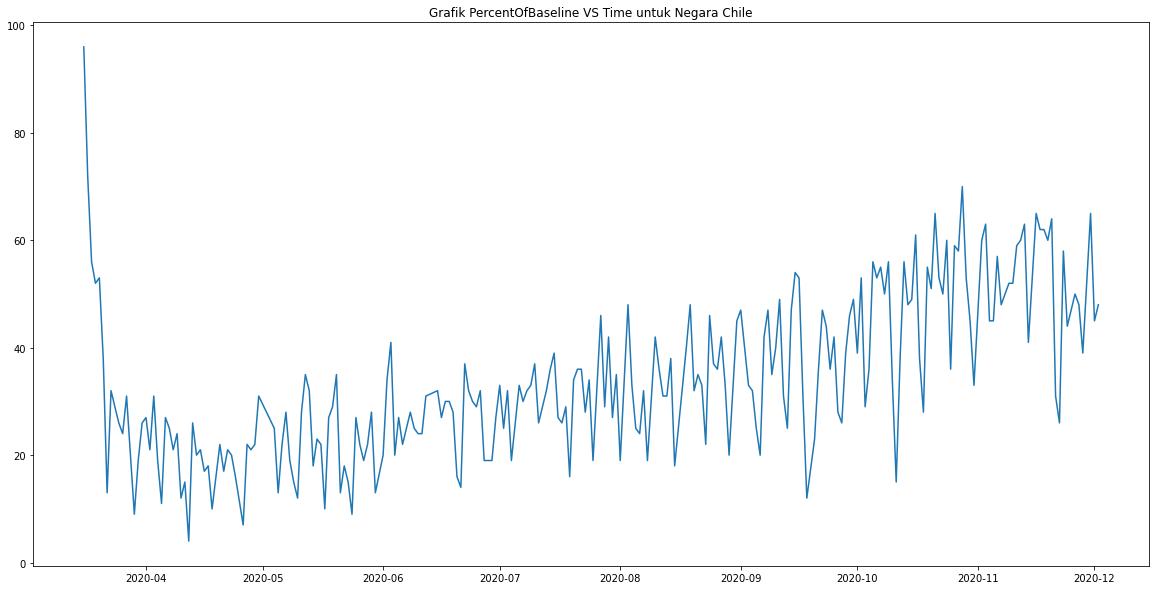

In [134]:
plt.figure(figsize=(20,10))
plt.plot(df_Chile)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara Chile")
plt.show()

In [135]:
print('Results of Dickey-Fuller Test:')
test_Chile = adfuller(df_Chile['PercentOfBaseline'], autolag='AIC')
output_Chile = pd.Series(test_Chile[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_Chile[4].items():
    output_Chile['Critical Value (%s)'%key] = value
print(output_Chile)

Results of Dickey-Fuller Test:
Test Statistic                  -0.831164
p-value                          0.809796
#Lags Used                      11.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


In [136]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest_Chile = kpss(df_Chile['PercentOfBaseline'].dropna(), regression='c')
kpss_output_Chile = pd.Series(kpsstest_Chile[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest_Chile[3].items():
    kpss_output_Chile['Critical Value (%s)'%key] = value
print (kpss_output_Chile)

Results of KPSS Test:
Test Statistic            1.135992
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


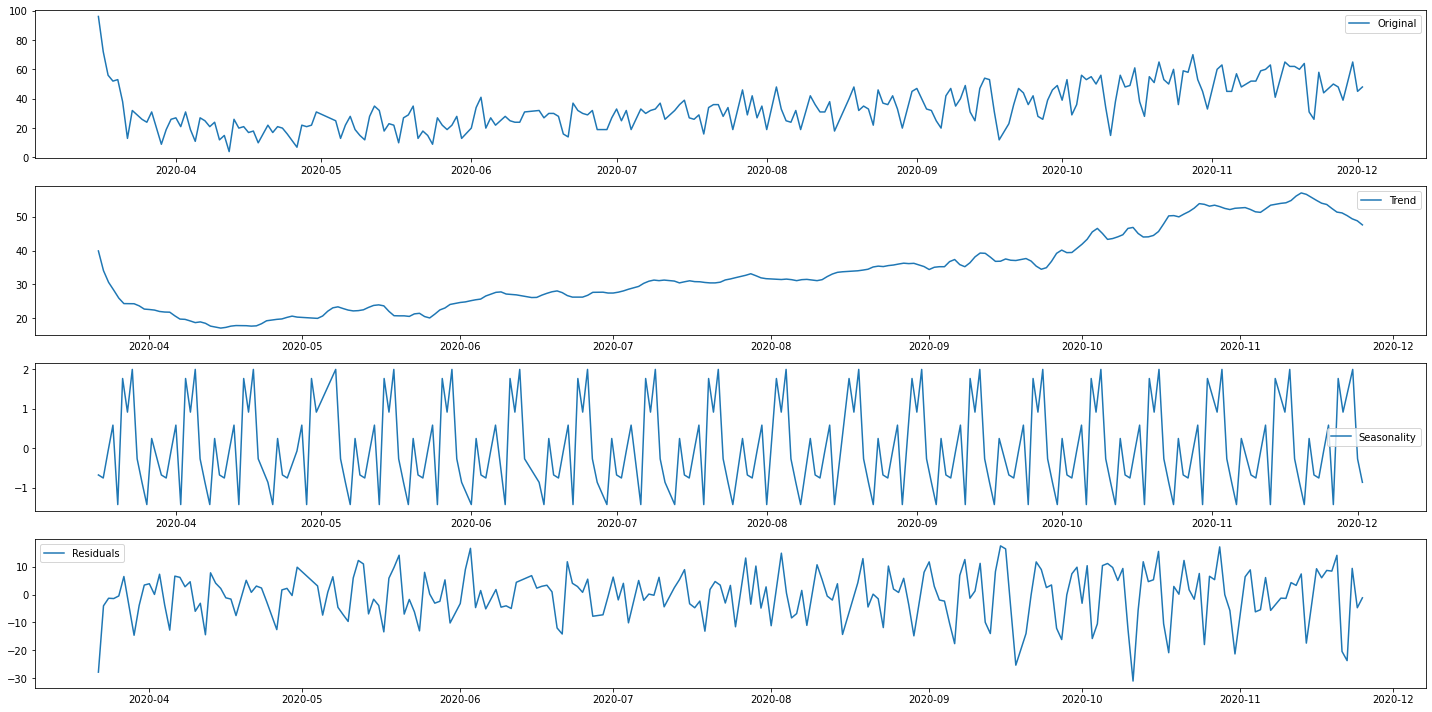

In [137]:
decomposition_Chile = seasonal_decompose(df_Chile.dropna(), model='additive', freq=12)

trend4 = decomposition_Chile.trend
seasonal4 = decomposition_Chile.seasonal
residual4 = decomposition_Chile.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_Chile['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend4, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal4,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual4, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

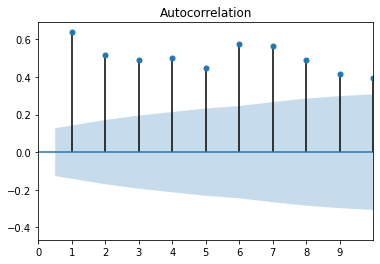

In [138]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_Chile['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

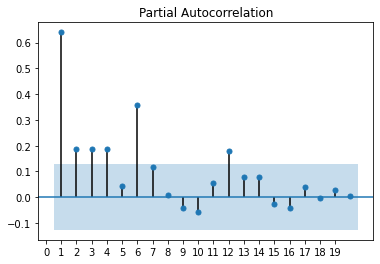

In [139]:
plot_pacf(df_Chile['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

#ARMA (Auto Regressive Moving Average) Model FOR Chile

In [140]:
# Create Training and Test for ARMA
size_ARMA_Chile = int(len(df_Chile['PercentOfBaseline'])*0.8)
train_ARMA_Chile = df_Chile['PercentOfBaseline'].iloc[:size_ARMA_Chile]
test_ARMA_Chile = df_Chile['PercentOfBaseline'].iloc[size_ARMA_Chile:]
# Build Model
model_ARMA_Chile = ARMA(train_ARMA_Chile, order=(1,2))  
fitted_ARMA_Chile = model_ARMA_Chile.fit() 
print(fitted_ARMA_Chile.summary())

# Forecast
fc_ARMA_Chile, se_ARMA_Chile, conf_ARMA_Chile = fitted_ARMA_Chile.forecast(len(test_ARMA_Chile), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARMA_Chile = pd.Series(fc_ARMA_Chile, index=test_ARMA_Chile.index)
lower_series_ARMA_Chile = pd.Series(conf_ARMA_Chile[:, 0], index=test_ARMA_Chile.index)
upper_series_ARMA_Chile = pd.Series(conf_ARMA_Chile[:, 1], index=test_ARMA_Chile.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  190
Model:                     ARMA(1, 2)   Log Likelihood                -705.947
Method:                       css-mle   S.D. of innovations              9.913
Date:                Mon, 25 Jul 2022   AIC                           1421.894
Time:                        05:28:13   BIC                           1438.129
Sample:                             0   HQIC                          1428.470
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.8634      6.070      5.579      0.000      21.966      45.761
ar.L1.PercentOfBaseline     0.9611      0.034     28.211      0.000       0.894       1.028


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Mean Squared Error: 383.827
Root Mean Squared Error: 19.592
Mean Absolute Error: 17.455


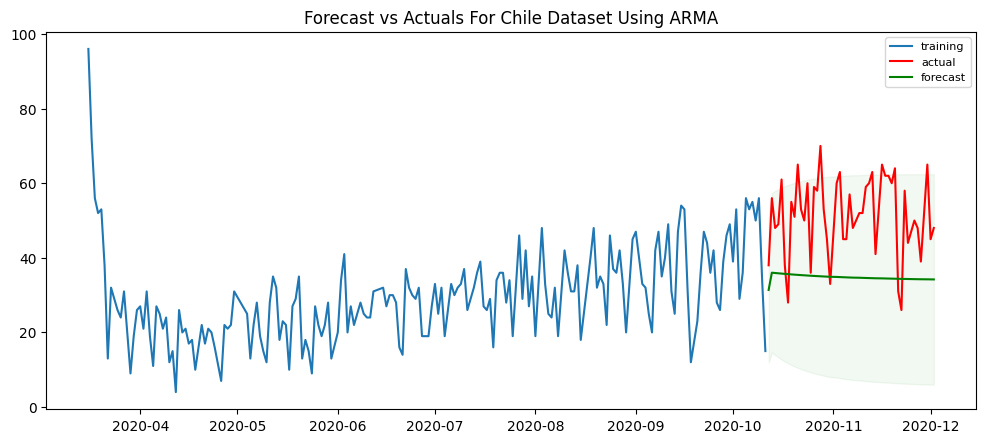

In [141]:
# Plot
mse = mean_squared_error(test_ARMA_Chile, fc_ARMA_Chile)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARMA_Chile, fc_ARMA_Chile)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARMA_Chile, label='training')
plt.plot(test_ARMA_Chile, label='actual',color='r')
plt.plot(fc_series_ARMA_Chile, label='forecast',color='g')
plt.fill_between(lower_series_ARMA_Chile.index, lower_series_ARMA_Chile, upper_series_ARMA_Chile,color='g', alpha=.05)
plt.title('Forecast vs Actuals For Chile Dataset Using ARMA')
plt.legend(loc='best', fontsize=8)
plt.show()

#ARIMA (AutoRegressive Integrated Moving Average) Model FOR Chile

In [142]:
# Create Training and Test for ARMA
size_ARIMA_Chile = int(len(df_Chile['PercentOfBaseline'])*0.8)
train_ARIMA_Chile = df_Chile['PercentOfBaseline'].iloc[:size_ARMA_Chile]
test_ARIMA_Chile = df_Chile['PercentOfBaseline'].iloc[size_ARMA_Chile:]

# Build Model
model_ARIMA_Chile = ARIMA(train_ARIMA_Chile, order=(0, 1, 2)) 
fitted_ARIMA_Chile = model_ARIMA_Chile.fit(disp=-1)  
print(fitted_ARIMA_Chile.summary())

# Forecast
fc_ARIMA_Chile, se_ARIMA_Chile, conf_ARIMA_Chile = fitted_ARIMA_Chile.forecast(len(test_ARIMA_Chile), alpha=0.05)  # An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range

# Make as pandas series
fc_series_ARIMA_Chile = pd.Series(fc_ARIMA_Chile, index=test_ARIMA_Chile.index)
lower_series_ARIMA_Chile = pd.Series(conf_ARIMA_Chile[:, 0], index=test_ARIMA_Chile.index)
upper_series_ARIMA_Chile = pd.Series(conf_ARIMA_Chile[:, 1], index=test_ARIMA_Chile.index)

                              ARIMA Model Results                              
Dep. Variable:     D.PercentOfBaseline   No. Observations:                  189
Model:                  ARIMA(0, 1, 2)   Log Likelihood                -702.926
Method:                        css-mle   S.D. of innovations              9.961
Date:                 Mon, 25 Jul 2022   AIC                           1413.851
Time:                         05:28:13   BIC                           1426.818
Sample:                              1   HQIC                          1419.105
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1373      0.221     -0.621      0.535      -0.571       0.296
ma.L1.D.PercentOfBaseline    -0.5249      0.074     -7.059      0.000      -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Mean Squared Error: 433.204
Root Mean Squared Error: 20.814
Mean Absolute Error: 18.565


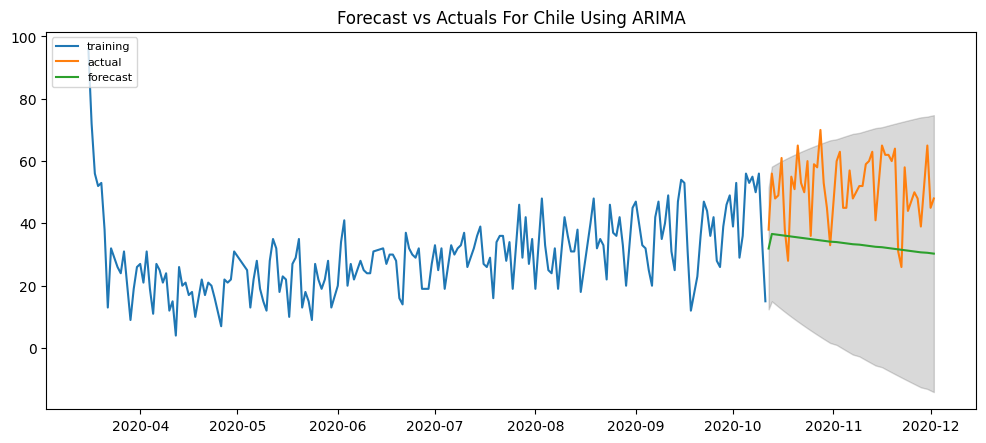

In [143]:
# Plot
mse = mean_squared_error(test_ARIMA_Chile, fc_ARIMA_Chile)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_ARIMA_Chile, fc_ARIMA_Chile)

print('Mean Squared Error: %.3f' % mse)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_ARIMA_Chile, label='training')
plt.plot(test_ARIMA_Chile, label='actual')
plt.plot(fc_series_ARIMA_Chile, label='forecast')
plt.fill_between(lower_series_ARIMA_Chile.index, lower_series_ARIMA_Chile, upper_series_ARIMA_Chile, color='k', alpha=.15)
plt.title('Forecast vs Actuals For Chile Using ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

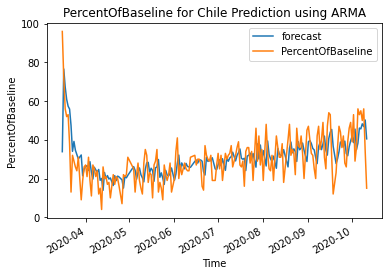

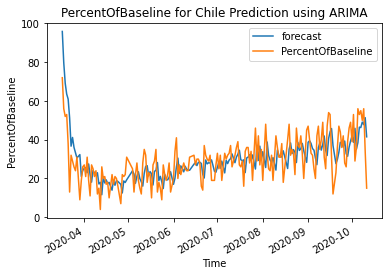

In [144]:
# Actual vs Fitted Prediction 
fitted_ARMA_Chile.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for Chile Prediction using ARMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
fitted_ARIMA_Chile.plot_predict(dynamic=False)
plt.title('PercentOfBaseline for Chile Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#Keras Neural Network Model

*   Recurrent neural networks (RNN) Stacked LSTM (Long Short-Term Memory) Model
*   Convolutional neural networks (CNN) Conv1d dan Bidirectional LSTM

In [145]:
training_set4=df_Chile['PercentOfBaseline']
training_set4=pd.DataFrame(training_set4)

In [146]:
# Feature Scaling
sc4 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled4 = sc4.fit_transform(training_set4)

In [147]:
# Creating a data structure with 47 timesteps and 1 output
X_train4 = []
y_train4 = []
size_train4 = int(len(df_Chile['PercentOfBaseline'])*0.2)
for i in range(size_train4, len(training_set4)):
    X_train4.append(training_set_scaled4[i-size_train4:i, 0])
    y_train4.append(training_set_scaled4[i, 0])
X_train4, y_train4 = np.array(X_train4), np.array(y_train4)

# Reshaping
X_train4 = np.reshape(X_train4, (X_train4.shape[0], X_train4.shape[1], 1))

In [148]:
print(X_train4.shape)

(191, 47, 1)


In [149]:
# Initialising the RNN using LSTM
model_Chile_RNN = Sequential()
# Adding the LSTM layer
# Adding the output layer
# Code here
model_Chile_RNN.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train4.shape[1],1)))
model_Chile_RNN.add(Dropout(0.2))
model_Chile_RNN.add(LSTM(50, activation="relu", return_sequences = True))
model_Chile_RNN.add(LSTM(50, activation="relu", return_sequences = False))
model_Chile_RNN.add(Dense(1))
model_Chile_RNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 47, 64)            16896     
                                                                 
 dropout_6 (Dropout)         (None, 47, 64)            0         
                                                                 
 lstm_16 (LSTM)              (None, 47, 50)            23000     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 60,147
Trainable params: 60,147
Non-trainable params: 0
_________________________________________________________________


In [150]:
# Compiling the RNN
# Code here
model_Chile_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [151]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model_Chile_RNN.fit(X_train4, y_train4, epochs=epoch, batch_size=batch_size)

Epoch 1/100
6/6 [==============================] - 4s 71ms/step - loss: 0.1218 - mse: 0.1218 - mae: 0.3177
Epoch 2/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0658 - mse: 0.0658 - mae: 0.2156
Epoch 3/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1114
Epoch 4/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0994
Epoch 5/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0994
Epoch 6/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0939
Epoch 7/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0948
Epoch 8/100
6/6 [==============================] - 0s 79ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0913
Epoch 9/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0926
Epoch 10/100
6/6 [===================

In [152]:
test_set4 = df_Chile['PercentOfBaseline']
test_set4=pd.DataFrame(test_set4)

In [153]:
test_set4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [154]:
# Getting the predicted PercentOfBaseline
size_test4 = int(len(df_Chile['PercentOfBaseline'])) + size_train4
dataset_total4 = pd.concat((training_set4['PercentOfBaseline'], test_set4['PercentOfBaseline']), axis = 0)
inputs4 = dataset_total4[len(dataset_total4) - len(test_set4) - size_train4:].values
inputs4 = inputs4.reshape(-1,1)
inputs4 = sc4.transform(inputs4)
X_test4 = []
for i in range(size_train4, size_test4):
    X_test4.append(inputs4[i-size_train4:i, 0])
X_test4 = np.array(X_test4)
X_test4 = np.reshape(X_test4, (X_test4.shape[0], X_test4.shape[1], 1))
predicted_PercentOfBaseline4 = model_Chile_RNN.predict(X_test4)
predicted_PercentOfBaseline4 = sc4.inverse_transform(predicted_PercentOfBaseline4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [155]:
predicted_PercentOfBaseline4=pd.DataFrame(predicted_PercentOfBaseline4)
predicted_PercentOfBaseline4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


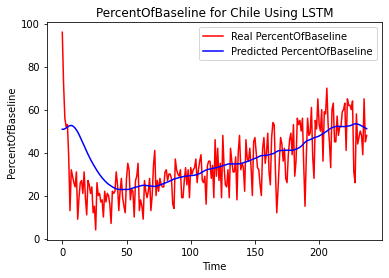

In [156]:
# Visualising the results
plt.plot(df_Chile['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline4, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for Chile Using LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [166]:
# Initialising the CNN using Conv1D and Bidirectional LSTM
model_Chile_CNN = Sequential()
model_Chile_CNN.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='causal', input_shape=(X_train4.shape[1],1)))
model_Chile_CNN.add(Dropout(0.2))
model_Chile_CNN.add(Bidirectional(LSTM(50,return_sequences=True)))
model_Chile_CNN.add(Bidirectional(LSTM(50,return_sequences=False)))
model_Chile_CNN.add(Dense(1))
model_Chile_CNN.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 47, 64)            256       
                                                                 
 dropout_9 (Dropout)         (None, 47, 64)            0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 47, 100)          46000     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 100)              60400     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 106,757
Trainable params: 106,757
Non-tr

In [158]:
# Compiling the CNN
# Code here
model_Chile_CNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])

In [159]:
# Fitting the RNN to the Training set
epoch = 100
batch_size = 64
model_Chile_CNN.fit(X_train4, y_train4, epochs=epoch, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 8s 117ms/step - loss: 0.0903 - mse: 0.0903 - mae: 0.2614
Epoch 2/100
3/3 [==============================] - 0s 117ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.1060
Epoch 3/100
3/3 [==============================] - 0s 117ms/step - loss: 0.0259 - mse: 0.0259 - mae: 0.1276
Epoch 4/100
3/3 [==============================] - 0s 127ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0931
Epoch 5/100
3/3 [==============================] - 0s 130ms/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1132
Epoch 6/100
3/3 [==============================] - 0s 131ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.1057
Epoch 7/100
3/3 [==============================] - 0s 124ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0900
Epoch 8/100
3/3 [==============================] - 0s 119ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0936
Epoch 9/100
3/3 [==============================] - 0s 117ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0934
Epoch 10/100
3/3 [==========

In [160]:
test_set_CNN4 = df_Chile['PercentOfBaseline']
test_set_CNN4=pd.DataFrame(test_set_CNN4)
test_set_CNN4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [161]:
# Getting the predicted PercentOfBaseline
size_test_CNN4 = int(len(df_Chile['PercentOfBaseline'])) + size_train4
dataset_total_CNN4 = pd.concat((training_set4['PercentOfBaseline'], test_set4['PercentOfBaseline']), axis = 0)
inputs_CNN4 = dataset_total_CNN4[len(dataset_total_CNN4) - len(test_set4) - size_train4:].values
inputs_CNN4 = inputs_CNN4.reshape(-1,1)
inputs_CNN4 = sc4.transform(inputs4)
X_test_CNN4 = []
for i in range(size_train4, size_test_CNN4):
    X_test_CNN4.append(inputs4[i-size_train4:i, 0])
X_test_CNN4 = np.array(X_test_CNN4)
X_test_CNN4 = np.reshape(X_test_CNN4, (X_test_CNN4.shape[0], X_test_CNN4.shape[1], 1))
predicted_PercentOfBaseline_CNN4 = model_Chile_CNN.predict(X_test_CNN4)
predicted_PercentOfBaseline_CNN4 = sc4.inverse_transform(predicted_PercentOfBaseline_CNN4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [162]:
predicted_PercentOfBaseline_CNN4=pd.DataFrame(predicted_PercentOfBaseline_CNN4)
predicted_PercentOfBaseline_CNN4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


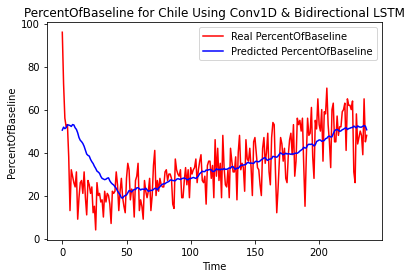

In [163]:
# Visualising the results
plt.plot(df_Chile['PercentOfBaseline'].values, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline_CNN4, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for Chile Using Conv1D & Bidirectional LSTM')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()